In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adult import Adult
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import root_mean_squared_error

In [ ]:
import pandas as pd

data_source = "adult"

if data_source == "adult":
    # Adult
    columns = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'
    ]

    df = pd.read_csv("./datasets/adult.data", 
                        header=None, 
                        names=columns, 
                        skipinitialspace=True)
    df_test = pd.read_csv("./datasets/adult.test", 
                        header=None, x
                        names=columns, 
                        skipinitialspace=True,
                        skiprows=1,
                        )
    df.replace(' ?', np.nan, inplace=True)
    df_test.replace(' ?', np.nan, inplace=True)
    target_name = "hours-per-week"
    sensitive_feature = "race"

    # Data to datatframe
    # df_train = pd.DataFrame(train_set.data, columns=train_set.columns)
    # df_test = pd.DataFrame(test_set.data, columns=test_set.columns)
    seed = 42

    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print("Numerical:", num_cols)
    try:
        num_cols.remove(target_name)
    except Exception as e:
        pass
    # sensitive_feature = "sex"
    X, y = df.drop(columns=[sensitive_feature, target_name]), df[target_name]
    X_test, y_test = df_test.drop(columns=[sensitive_feature, target_name]), df_test[target_name]
    display(X.head())

    oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first")
    X_ = oh.fit_transform(X.drop(columns=num_cols, errors='ignore'))
    X_ = pd.DataFrame(X_, columns=oh.get_feature_names_out(), index=X.index)
    X = pd.concat([X_, X[num_cols]], axis=1)

    X_ = oh.fit_transform(X_test.drop(columns=num_cols, errors='ignore'))
    X_ = pd.DataFrame(X_, columns=oh.get_feature_names_out(), index=X_test.index)
    X_test = pd.concat([X_, X_test[num_cols]], axis=1)
    # X.head()
    display(X_test.head())



# # Student
# df = pd.read_csv("datasets/student-mat.csv", sep=";")
# df = df.loc[df.G3 > 0,:]
# print(df.shape)


Numerical: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship     sex  capital-gain  \
0       Never-married       Adm-clerical  Not-in-family    Male          2174   
1  Married-civ-spouse    Exec-managerial        Husband    Male             0   
2            Divorced  Handlers-cleaners  Not-in-family    Male             0   
3  Married-civ-spouse  Handlers-cleaners        Husband    Male             0   
4  Married-civ-spouse     Prof-specialty           Wife  Female             0   

   capital-loss native-country salary  
0             0  United-States  <=50K  
1             0  United-States  <=50K  
2             0  United-States  <=50K  
3             0  United-States  <=50K  
4             0           Cuba  <=50K

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  1.0                     0.0   
3                    0.0                  0.0                     0.0   
4                    0.0                  0.0                     0.0   

   workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
0                1.0                     0.0                         0.0   
1                1.0                     0.0                         0.0   
2                0.0                     0.0                         0.0   
3                1.0                     0.0                         0.0   
4                0.0                     0.0                         0.0   

   workclass_State-gov  workclass_Without-pay  education_11th  education_12th  \
0                  0.0                    0.0             1.0             0.0   
1                  0.0                    0.0             0.0             0.0   
2                  0.0                    0.0             0.0             0.0   
3                  0.0                    0.0             0.0             0.0   
4                  0.0                    0.0             0.0             0.0   

   ...  native-country_Trinadad&Tobago  native-country_United-States  \
0  ...                             0.0                           1.0   
1  ...                             0.0                           1.0   
2  ...                             0.0                           1.0   
3  ...                             0.0                           1.0   
4  ...                             0.0                           1.0   

   native-country_Vietnam  native-country_Yugoslavia  salary_>50K.  age  \
0                     0.0                        0.0           0.0   25   
1                     0.0                        0.0           0.0   38   
2                     0.0                        0.0           1.0   28   
3                     0.0                        0.0           1.0   44   
4                     0.0                        0.0           0.0   18   

   fnlwgt  education-num  capital-gain  capital-loss  
0  226802              7             0             0  
1   89814              9             0             0  
2  336951             12             0             0  
3  160323             10          7688             0  
4  103497             10             0             0  

[5 rows x 95 columns]

In [25]:

if data_source != "adult":
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed)
else:
    X_train, y_train = X.copy(), y.copy()

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=seed)


# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:, num_cols] = scaler.fit_transform(X_train.loc[:, num_cols])
X_val.loc[:, num_cols] = scaler.transform(X_val.loc[:, num_cols])
X_test.loc[:, num_cols] = scaler.transform(X_test.loc[:, num_cols])


# # # Sensitive idexing
# # sensitive_feature = "sex_M"
# # sensitive_idx_train =  #(X_train[sensitive_feature] == 1).astype(float).to_numpy()
# # sensitive_idx_val = (X_val[sensitive_feature] == 1).astype(float).to_numpy()
# # sensitive_idx_test = (X_test[sensitive_feature] == 1).astype(float).to_numpy()

# # X_train = X_train.drop(columns=[sensitive_feature])
# # X_val = X_val.drop(columns=[sensitive_feature])
# # X_test = X_test.drop(columns=[sensitive_feature])

X_train.head()

workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
5514                     0.0                  1.0                     0.0   
19777                    0.0                  0.0                     0.0   
10781                    0.0                  0.0                     0.0   
32240                    0.0                  0.0                     0.0   
9876                     0.0                  0.0                     0.0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-inc  \
5514                 0.0                     0.0                         0.0   
19777                1.0                     0.0                         0.0   
10781                0.0                     0.0                         1.0   
32240                1.0                     0.0                         0.0   
9876                 1.0                     0.0                         0.0   

       workclass_State-gov  workclass_Without-pay  education_11th  \
5514                   0.0                    0.0             0.0   
19777                  0.0                    0.0             0.0   
10781                  0.0                    0.0             0.0   
32240                  0.0                    0.0             0.0   
9876                   0.0                    0.0             0.0   

       education_12th  ...  native-country_Trinadad&Tobago  \
5514              0.0  ...                             0.0   
19777             0.0  ...                             0.0   
10781             0.0  ...                             0.0   
32240             0.0  ...                             0.0   
9876              0.0  ...                             0.0   

       native-country_United-States  native-country_Vietnam  \
5514                            1.0                     0.0   
19777                           1.0                     0.0   
10781                           1.0                     0.0   
32240                           1.0                     0.0   
9876                            1.0                     0.0   

       native-country_Yugoslavia  salary_>50K       age    fnlwgt  \
5514                         0.0          1.0 -0.408756  0.080051   
19777                        0.0          1.0 -0.188857 -0.981653   
10781                        0.0          0.0  1.423734  0.126197   
32240                        0.0          0.0 -1.288351 -0.090935   
9876                         0.0          0.0 -0.848554  0.856334   

       education-num  capital-gain  capital-loss  
5514        1.133702     -0.145715     -0.217998  
19777       0.357049     -0.145715      4.457168  
10781      -1.972910     -0.145715     -0.217998  
32240       0.357049     -0.145715     -0.217998  
9876       -0.031277     -0.145715     -0.217998  

[5 rows x 96 columns]

In [ ]:
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet, PoissonRegressor, QuantileRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

from src.fair_models import ModelStacking, ContextualFairStacking

import warnings
warnings.filterwarnings('ignore')

class ConstantModel:
    def __init__(self):
        self.y_mean = None

    def fit(self, X, y):
        self.y_mean = np.mean(y)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        return y_pred + self.y_mean

    def __str__(self):
        return "ConstantModel"
    


max_depth = 5
n_estimators = 100
models = [
    ConstantModel(),
    BayesianRidge(fit_intercept=True, ), 
    LinearRegression(fit_intercept=True), 
    ElasticNet(fit_intercept=True, alpha=1e-3, l1_ratio=0.1), 
    PoissonRegressor(fit_intercept=True), 
    # QuantileRegressor(fit_intercept=True, ),
    RandomForestRegressor(
        n_estimators=500,
        max_depth=max_depth,
        min_samples_split=0.1,
        # max_features='auto',  # or 'sqrt' for large feature sets
        random_state=42,
        n_jobs=-1
    ),
    ExtraTreesRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ),
    # GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=1e-3, max_depth=max_depth),
    GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=1.0,
        min_samples_split=2,
        random_state=42
    ),
    # KNeighborsRegressor(
    # n_neighbors=7,
    # weights='uniform',
    # metric='minkowski',
    # p=2,
    # leaf_size=30,
    # algorithm='auto'
    # ),
    # DecisionTreeRegressor(max_depth=max_depth),
]

betas = np.linspace(0.1, 1, 5)
for beta in betas:
    model = StableRegression(fit_intercept=True, keep_frac=beta, l1=1e-6, l2=0)
    models.append(model)

trained_models = []
for model in models:
    model.fit(X_train, y_train)
    trained_models.append(model)



sensitive_idx = []
df_train = df.loc[df.index.isin(X_train.index), :].reset_index()
for val in df[sensitive_feature].unique():
    df_val = df_train.loc[df_train[sensitive_feature] == val, :]
    # print("AA")
    sensitive_idx.append(list(df_val.index))
for f_w_ in np.linspace(0, 1, 6):
    # f_w = f_w_ / 10
    models.append( 
        # ModelStacking(
        ContextualFairStacking(
            trained_models=trained_models, sensitive_idx=sensitive_idx, 
            # fair_weight=f_w_, 
            l2_lambda=0,
            sum_to_one=True,
            nonneg = True,
            fit_intercept= True,
            solver= "MOSEK",#"OSQP",
            # verbose: bool = False,
            coupling=1e-3, #closeness to a general W
            gate= "knn", #"rbf",
            # rbf_gamma: Optional[float] = None,
            knn_k = 7,
            # gate_features: Optional[Sequence[int]] = None,
        )
    )



model_names = [str(model) for model in models]
train_losses = []
train_fairnesses = []
val_losses = []
val_fairnesses = []
test_losses = []
test_fairnesses = []
# sensitive_feature_="sex"

color_names = [
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "cyan",
    "magenta",
    "yellow",
    "black",
    "white",
    "brown",
    "gray",
    "pink",
    "lime",
    "navy",
    "gold",
    "teal",
    "olive",
    "coral",
    "turquoise",
    "indigo",
    "salmon",
    "chocolate",
    "orchid",
    "darkgreen",
    "deeppink",
    "royalblue",
    "sienna",
    "skyblue",
    "darkred"
]

markers = [
    'o',      # circle
    '^',      # triangle_up
    'v',      # triangle_down
    '<',      # triangle_left
    '>',      # triangle_right
    's',      # square
    'p',      # pentagon
    '*',      # star
    'h',      # hexagon1
    'H',      # hexagon2
    'D',      # diamond
    'd',      # thin_diamond
    'x',      # x
    '+',      # plus
    'P',      # plus_filled
    'X',      # x_filled
    '1',      # tri_down
    '2',      # tri_up
    '3',      # tri_left
    '4',      # tri_right
    '|',      # vline
    '_',      # hline
    '8',      # caretup
    '6',      # caretdown
    '4',      # caretleft
    '5',      # caretright
    '.',      # point
    ',',      # pixel
    'None'    # no marker (line only)
]


plt.figure(figsize=(8,6))
for i,model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    train_loss = root_mean_squared_error(y_train, y_pred)
    train_losses.append(train_loss)
    groups_losses = []
    for val in df[sensitive_feature].unique():
    # for val in ["F", "M"]:
        df_g = df.loc[df[sensitive_feature]==val, :]
        train_idx_g = [i for i in X_train.index if i in df_g.index]
        X_g, y_g = X_train.loc[train_idx_g, :], y_train.loc[train_idx_g]
        y_pred_g = model.predict(X_g)
        group_loss = root_mean_squared_error(y_g, y_pred_g)
        groups_losses.append(group_loss)
    print(model, groups_losses)
    train_fairness = max(groups_losses) - min(groups_losses)
    plt.plot(train_fairness, train_loss, markers[i], label=model_names[i], color=color_names[i], markeredgecolor='black')
    train_fairnesses.append(train_fairness)



plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel("(Un)Fairness")
plt.ylabel("Model Error")
plt.show()


plt.figure(figsize=(8,6))
for i,model in enumerate(models):
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    val_loss = root_mean_squared_error(y_val, y_pred)
    val_losses.append(val_loss)
    groups_losses = []
    for val in df[sensitive_feature].unique():
    # for val in ["F", "M"]:
        df_g = df.loc[df[sensitive_feature]==val, :]
        val_idx_g = [i for i in X_val.index if i in df_g.index]
        X_g, y_g = X_val.loc[val_idx_g, :], y_val.loc[val_idx_g]
        y_pred_g = model.predict(X_g)
        group_loss = root_mean_squared_error(y_g, y_pred_g)
        groups_losses.append(group_loss)
    # print(model, groups_losses)
    val_fairness = max(groups_losses) - min(groups_losses)
    plt.plot(val_fairness, val_loss, markers[i], label=model_names[i], color=color_names[i], markeredgecolor='black')
    val_fairnesses.append(val_fairness)

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.xlabel("(Un)Fairness")
plt.ylabel("Model Error")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'fair_weight'

Solving for beta= 0.1
Solving for beta= 0.2
Solving for beta= 0.30000000000000004
Solving for beta= 0.4
Solving for beta= 0.5
Solving for beta= 0.6
Solving for beta= 0.7000000000000001
Solving for beta= 0.8
Solving for beta= 0.9
Solving for beta= 1.0


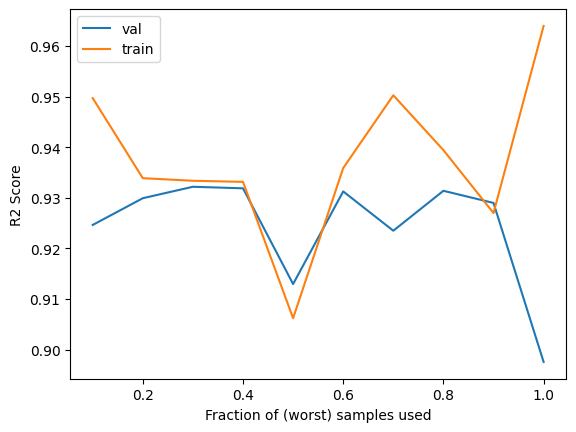

In [ ]:
import cvxpy as cp
import seaborn as sns

# class ModelStacking:
#     def __init__(self, trained_models, sensitive_idx, fair_weight=0.5, l2_lambda=1e-6, solver="MOSEK", verbose=False):
#         self.trained_models = trained_models
#         self.sensitive_idx = sensitive_idx
#         self.fair_weight = fair_weight
#         self.l2_lambda = l2_lambda
#         # Solver
#         self.solver = solver
#         self.verbose = verbose
#         # Model
#         self.y_pred_matrix = None
#         self.coef_ = None

#     def fit(self, X, y):
#         try:
#             X, y = X.copy().to_numpy(), y.copy().to_numpy()
#         except Exception as e:
#             pass
#         g, k = len(self.sensitive_idx), len(self.trained_models)
#         n,m = X.shape

#         self.y_pred_matrix = np.zeros(shape=(n, k), dtype=np.float32) 
#         for j in range(k):
#             model = self.trained_models[j]
#             self.y_pred_matrix[:,j] = model.predict(X)

#         # Optimization
#         e_k = np.ones(k)
#         # W = cp.Variable((g,k), nonneg=True)
#         W = cp.Variable(k, nonneg=True)
#         z = cp.Variable(n)
#         u = cp.Variable(1)

#         # constraints = []#
#         constraints = [
#              y - W @ self.y_pred_matrix.T <= z,
#             -y + W @ self.y_pred_matrix.T <= z,
#             # W @ e_k <= 1
#             cp.sum(W) <= 1
#         ]
#         for g_, idx_list in enumerate(self.sensitive_idx):
#             n_g = len(idx_list)
#             constraints+=[ cp.quad_form(z[idx_list], np.eye(n_g))/n_g  <= u]
        
#         problem = cp.Problem(cp.Minimize( (1-self.fair_weight) * cp.quad_form(z, np.eye(n))/n  + self.fair_weight*u + self.l2_lambda * cp.norm2(W)), constraints)

#         # Choose a default solver if none supplied.
#         solver = self.solver
#         if solver is None:
#             # ECOS handles SOCP well; SCS is a fallback; CLARABEL also good if installed.
#             solver = "ECOS"
#         problem.solve(solver=solver, verbose=self.verbose)#, **self.solver_kwargs)
        
#         self.coef_ = W.value

#     def predict(self, X_):
#         n, k = X_.shape[0], self.y_pred_matrix.shape[1]
#         self.y_pred_matrix = np.zeros(shape=(n, k), dtype=np.float32)
#         for j in range(k):
#             model = self.trained_models[j]
#             self.y_pred_matrix[:,j] = model.predict(X_)
#         return self.coef_ @ self.y_pred_matrix.T

#     def __str__(self):
#         return f"ModelStacking(fair_weight={self.fair_weight})"
    




    

# models = [
#     ConstantModel(),
#     BayesianRidge(fit_intercept=True, ), 
#     LinearRegression(fit_intercept=True), 
#     ElasticNet(fit_intercept=True, alpha=1e-2, l1_ratio=0.1), 
#     PoissonRegressor(fit_intercept=True), 
#     # QuantileRegressor(fit_intercept=True, ),
#     RandomForestRegressor(n_estimators=100, max_depth=5), 
#     ExtraTreesRegressor(n_estimators=100, max_depth=5),
#     GradientBoostingRegressor(n_estimators=100, learning_rate=1e-3, max_depth=5),
#     KNeighborsRegressor(n_neighbors=5),
#     DecisionTreeRegressor(max_depth=5),
# ]

# trained_models = []
# for model in models:
#     model.fit(X_train, y_train)
#     trained_models.append(model)


# model = ModelStacking(trained_models=trained_models, sensitive_idx=sensitive_idx, fair_weight=0.5)
# model.fit(X_train, y_train)
# y_pred_ = model.predict(X_train)
# # plt.scatter(y_pred_, y_train, colo)
# sns.scatterplot(x=y_pred_, y=y_train, hue=df_train[sensitive_feature].to_numpy())
# plt.show()
# sns.histplot(x=y_train, multiple='stack', hue=df_train[sensitive_feature].to_numpy(), bins=10)
# plt.show()
# sns.histplot(x=y_pred_, multiple='stack', hue=df_train[sensitive_feature].to_numpy(), bins=10)
# plt.show()


import numpy as np
import cvxpy as cp
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

import numpy as np
from typing import Optional, Union
import cvxpy as cp


r2_scores = []
r2_scores_train = []
betas = np.linspace(0.1, 1, 10)
for beta in betas:
    print("Solving for beta=", beta)
    model = StableRegression(fit_intercept=True, keep_frac=beta, l1=1e-6, l2=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    r2_scores.append(r2_score(y_pred, y_val))
    y_pred = model.predict(X_train)
    r2_scores_train.append(r2_score(y_pred, y_train))

plt.plot(betas, r2_scores, label="val")
plt.plot(betas, r2_scores_train, label="train")
plt.legend()
plt.ylabel("R2 Score")
plt.xlabel("Fraction of (worst) samples used")
plt.show()

In [171]:
# print(X)


# Predict
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

beta_ = lm.coef_

# X_g1, y_g1 = np.array(X_test.loc[sensitive, :]), np.array(y_test.loc[sensitive])
# X_g2, y_g2 = np.array(X_test.loc[~sensitive, :]), np.array(y_test.loc[~sensitive])

mask_np = (sensitive_idx_train == 1)  # bool ndarray

X_g1 = X_train.iloc[mask_np, :]
y_g1 = y_train.iloc[mask_np]
X_g2 = X_train.iloc[~mask_np, :]
y_g2 = y_train.iloc[~mask_np]

y_g1_pred = X_g1 @ beta_ + lm.intercept_
y_g2_pred = X_g2 @ beta_ + lm.intercept_

print(f"Training metrics for Target={target}: ")
print("RMSE: ", root_mean_squared_error(y_train, y_pred_train))
print(f"RMSE group 1 ({sensitive_feature}=1): ", root_mean_squared_error(y_g1, y_g1_pred))
print(f"RMSE group 2 ({sensitive_feature}=0): ", root_mean_squared_error(y_g2, y_g2_pred))
# print(f"Relative RMSE group 1 ({sensitive_feature}=1): ", root_mean_squared_error(y_g1, y_g1_pred)/root_mean_squared_error(y_train, y_pred_train))
# print(f"Relative RMSE group 2 ({sensitive_feature}=0): ", root_mean_squared_error(y_g2, y_g2_pred)/root_mean_squared_error(y_train, y_pred_train))


lm_g1 = LinearRegression(fit_intercept=True)
lm_g1.fit(X_g1, y_g1)
y_g1_pred = lm_g1.predict(X_g1)
print(f"RMSE group 1 ({sensitive_feature}=1) self-model: ", root_mean_squared_error(y_g1, y_g1_pred))
lm_g2 = LinearRegression(fit_intercept=True)
lm_g2.fit(X_g2, y_g2)
y_g2_pred = lm_g2.predict(X_g2)
print(f"RMSE group 1 ({sensitive_feature}=0) self-model: ", root_mean_squared_error(y_g2, y_g2_pred))


mask_np = (sensitive_idx_test == 1)  # bool ndarray

X_g1 = X_test.iloc[mask_np, :]
y_g1 = y_test.iloc[mask_np]
X_g2 = X_test.iloc[~mask_np, :]
y_g2 = y_test.iloc[~mask_np]

y_g1_pred = X_g1 @ beta_ + lm.intercept_
y_g2_pred = X_g2 @ beta_ + lm.intercept_

print(f"Testing metrics for Target={target}: ")
print("RMSE: ", root_mean_squared_error(y_test, y_pred_test))
print(f"RMSE group 1 ({sensitive_feature}=1): ", root_mean_squared_error(y_g1, y_g1_pred))
print(f"RMSE group 2 ({sensitive_feature}=0): ", root_mean_squared_error(y_g2, y_g2_pred))
# print(f"Relative RMSE group 1 ({sensitive_feature}=1): ", root_mean_squared_error(y_g1, y_g1_pred)/root_mean_squared_error(y_test, y_pred_test))
# print(f"Relative RMSE group 2 ({sensitive_feature}=0): ", root_mean_squared_error(y_g2, y_g2_pred)/root_mean_squared_error(y_test, y_pred_test))

y_g1_pred = lm_g1.predict(X_g1)
print(f"RMSE group 1 ({sensitive_feature}=1) self-model: ", root_mean_squared_error(y_g1, y_g1_pred))
y_g2_pred = lm_g2.predict(X_g2)
print(f"RMSE group 1 ({sensitive_feature}=0) self-model: ", root_mean_squared_error(y_g2, y_g2_pred))



Training metrics for Target=G3: 
RMSE:  2.068301893008671
RMSE group 1 (sex_M=1):  1.9864125133887145
RMSE group 2 (sex_M=0):  2.1428374733490236
RMSE group 1 (sex_M=1) self-model:  1.2314841467453121
RMSE group 1 (sex_M=0) self-model:  1.3366296185168303
Testing metrics for Target=G3: 
RMSE:  3.7930046757866718
RMSE group 1 (sex_M=1):  3.7057062674352292
RMSE group 2 (sex_M=0):  3.86944466946367
RMSE group 1 (sex_M=1) self-model:  5.09962943422749
RMSE group 1 (sex_M=0) self-model:  5.38579432674939


In [172]:
import cvxpy as cp
# pip install cvxpy
import numpy as np
import cvxpy as cp
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import StandardScaler

class StableRegressionCVaR(BaseEstimator, RegressorMixin):
    """
    Stable regression via CVaR_α of squared residuals (dual of capped-adversary reweighting).

    Solve:
        minimize_{β, b0, ν, ξ >= 0}
            ν + (1/((1-α) n)) * sum_i ξ_i  +  (λ2/2) * ||β||_2^2  +  λ1 * ||β||_1
        s.t.
            (y_i - b0 - x_i^T β)^2 - ν <= ξ_i    for all i
            ξ_i >= 0

    - α ∈ (0,1): tail level. α=0.9 targets the worst 10% average (robust).
    - λ2 >= 0: optional ridge (good for collinearity / global X perturbations).
    - λ1 >= 0: optional lasso (column-wise stability / sparsity).
    - fit_intercept: include an intercept (b0).
    - standardize: standardize X (and center y) internally for better numerics.

    This is a single convex program (SOCP-compatible) solved by cvxpy.
    """
    def __init__(self, alpha=0.9, lambda2=0.0, lambda1=0.0,
                 fit_intercept=True, standardize=True, solver=None, solver_kwargs=None, verbose=False, 
                 # fairness inputs
                 sensitive_group_idx=None, sensitive_weight=0.0):
        self.alpha = alpha
        self.lambda2 = float(lambda2)
        self.lambda1 = float(lambda1)
        self.fit_intercept = fit_intercept
        self.standardize = standardize
        self.solver = solver  # e.g., "ECOS", "OSQP", "SCS", "CLARABEL"
        self.solver_kwargs = solver_kwargs if solver_kwargs is not None else {}
        self.verbose = verbose

        # attrs learned in fit
        self.coef_ = None
        self.intercept_ = 0.0
        self.scaler_ = None
        self.y_mean_ = 0.0

        # Fainress attributes
        self.sensitive_group_idx = sensitive_group_idx
        self.sensitive_weight = sensitive_weight

    def _prepare_data(self, X, y, fitting=True):
        X = check_array(X, accept_sparse=False, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1)
        if fitting:
            X, y = check_X_y(X, y, accept_sparse=False, dtype=float, y_numeric=True)
        if self.standardize:
            if fitting:
                self.scaler_ = StandardScaler(with_mean=True, with_std=True)
                Xs = self.scaler_.fit_transform(X)
                self.y_mean_ = y.mean()
            else:
                Xs = self.scaler_.transform(X)
            ys = y - (self.y_mean_ if self.fit_intercept else 0.0)
            return Xs, ys
        else:
            # no scaling; center y only if fit_intercept to help numerics in cvx
            ys = y - (y.mean() if (fitting and self.fit_intercept) else (self.y_mean_ if self.fit_intercept else 0.0))
            if fitting and self.fit_intercept:
                self.y_mean_ = y.mean()
            return X, ys

    def fit(self, X, y):
        X, y = self._prepare_data(X, y, fitting=True)
        n, p = X.shape
        if not (0 < self.alpha < 1):
            raise ValueError("alpha must be in (0,1).")

        beta = cp.Variable(p)
        b0 = cp.Variable() if self.fit_intercept else 0.0
        nu = cp.Variable()         # CVaR threshold
        xi = cp.Variable(n, nonneg=True)

        resid = y - (X @ beta + (b0 if self.fit_intercept else 0.0))
        # CVaR_α of squared residuals (dual form):
        if self.sensitive_group_idx is None:
            constraints = [cp.square(resid) <= xi + nu]  # elementwise
        else:
            constraints  = [self.sensitive_weight * cp.square(resid[self.sensitive_group_idx == 1]) <= xi[self.sensitive_group_idx == 1] + nu]  # sensitive group 1
            constraints += [(1-self.sensitive_weight) * cp.square(resid[self.sensitive_group_idx == 0]) <= xi[self.sensitive_group_idx == 0] + nu]  # sensitive group 1

        obj = nu + (1.0 / ((1.0 - self.alpha) * n)) * cp.sum(xi)
        if self.lambda2 > 0:
            obj += (self.lambda2 / 2.0) * cp.sum_squares(beta)
        if self.lambda1 > 0:
            obj += self.lambda1 * cp.norm1(beta)

        problem = cp.Problem(cp.Minimize(obj), constraints)

        # Choose a default solver if none supplied.
        solver = self.solver
        if solver is None:
            # ECOS handles SOCP well; SCS is a fallback; CLARABEL also good if installed.
            solver = "ECOS"

        problem.solve(solver=solver, verbose=self.verbose, **self.solver_kwargs)

        if problem.status not in ("optimal", "optimal_inaccurate"):
            raise RuntimeError(f"Optimization did not converge: status={problem.status}")

        beta_hat = beta.value
        b0_hat = b0.value if self.fit_intercept else 0.0

        # Unscale back to original feature space if needed
        if self.standardize:
            # original y ~ (X_std * beta) + b0 + y_mean
            # so X_orig * (beta / std) + intercept_orig
            scale = self.scaler_.scale_
            mean = self.scaler_.mean_
            self.coef_ = (beta_hat / scale)
            # Intercept in original space:
            # y = ( (X - mean)/scale @ beta_hat ) + b0_hat + y_mean
            #   = X @ (beta_hat/scale) + (y_mean - (mean/scale)·beta_hat + b0_hat)
            self.intercept_ = self.y_mean_ - np.dot(mean / scale, beta_hat) + (b0_hat if self.fit_intercept else 0.0)
        else:
            self.coef_ = beta_hat
            # We centered y by y_mean_ if fit_intercept, so add it back:
            self.intercept_ = (b0_hat + self.y_mean_) if self.fit_intercept else 0.0

        return self

    def predict(self, X):
        X = check_array(X, accept_sparse=False, dtype=float)
        if self.coef_ is None:
            raise ValueError("Model is not fitted yet.")
        return X @ self.coef_ + self.intercept_

    # Optional: score as negative CVaR of squared errors on a set (bigger is better).
    def score(self, X, y):
        y = np.asarray(y, dtype=float).reshape(-1)
        yhat = self.predict(X)
        errs2 = (y - yhat) ** 2
        n = errs2.size
        k = max(1, int(np.ceil((1.0 - self.alpha) * n)))
        # average of largest k squared residuals (CVaR empirical)
        tail_avg = np.mean(np.partition(errs2, n - k)[-k:])
        # negative so higher score is better (like R^2-ish direction)
        return -tail_avg

        

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  3.2558014345788617
RMSE group 1 (sex_M=1):  4.447014052246604
RMSE group 2 (sex_M=0):  1.3879292429610612
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.831515963022215
RMSE group 1 (sex_M=1):  4.649316950644187
RMSE group 2 (sex_M=0):  4.988899025285937
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  3.26379

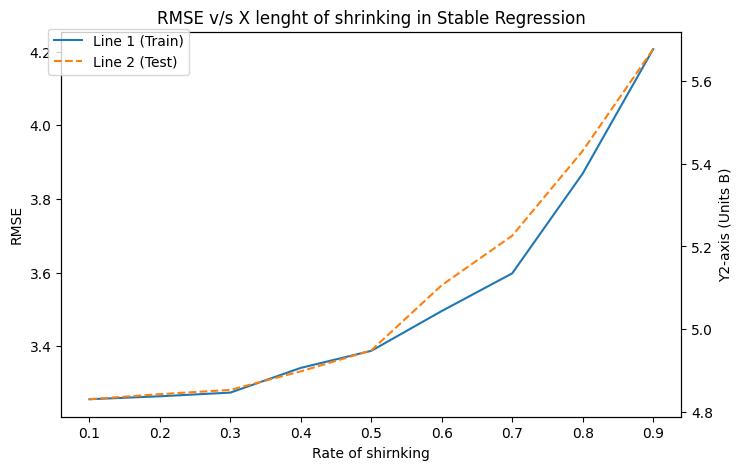

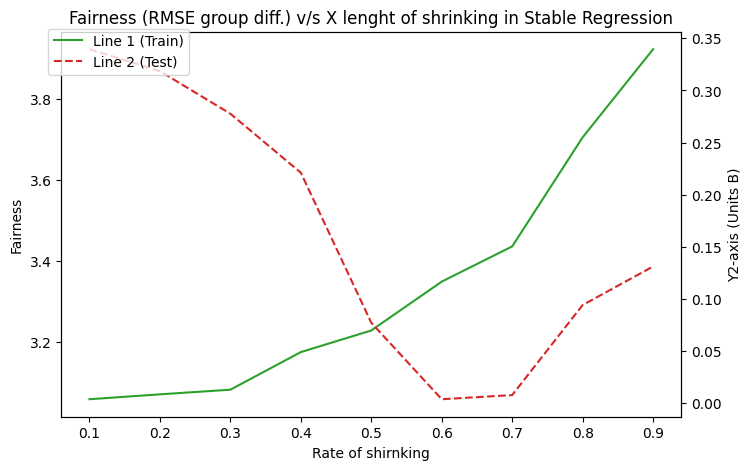

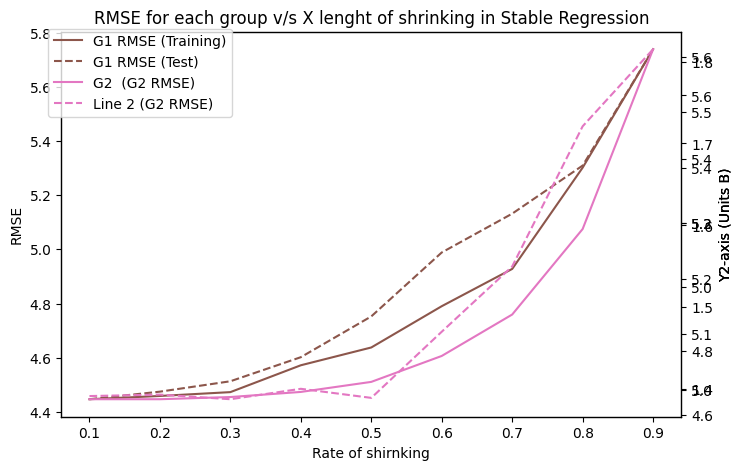

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.893716060000601
RMSE group 1 (sex_M=1):  3.8743968723547964
RMSE group 2 (sex_M=0):  1.4488666914674655
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.610345932665033
RMSE group 1 (sex_M=1):  4.438563939205427
RMSE group 2 (sex_M=0):  4.758792300116007
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.89483

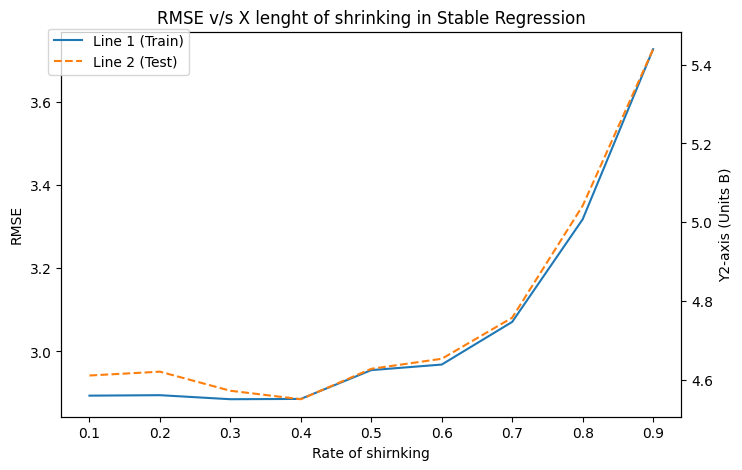

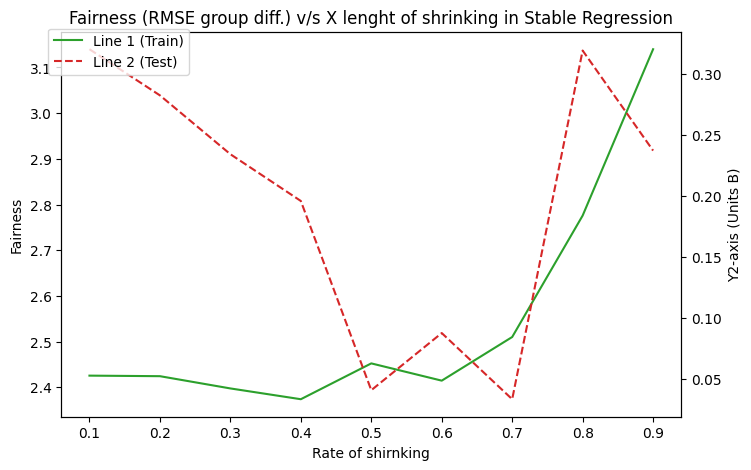

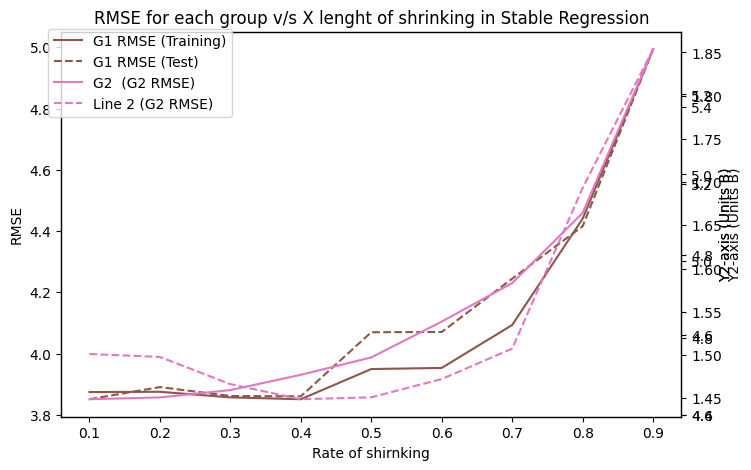

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.6812462821871197
RMSE group 1 (sex_M=1):  3.5207589810417863
RMSE group 2 (sex_M=0):  1.505708732356384
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.456982359841348
RMSE group 1 (sex_M=1):  4.306043655765894
RMSE group 2 (sex_M=0):  4.587825421141555
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.68715

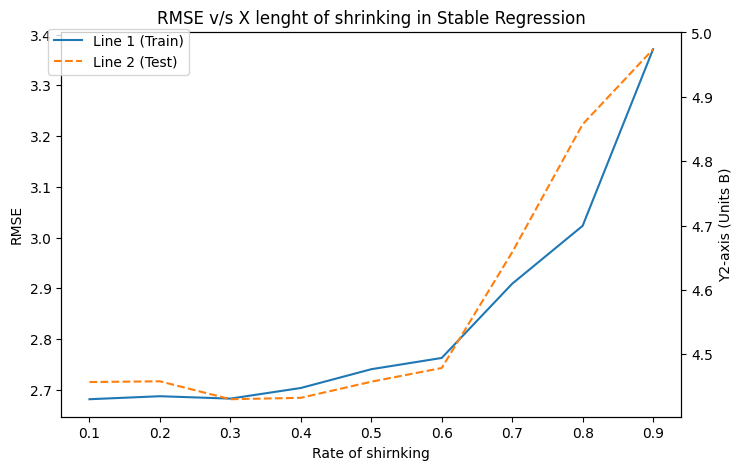

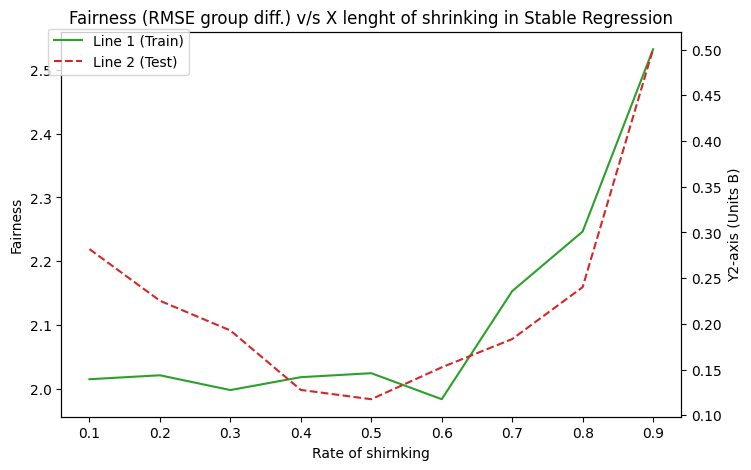

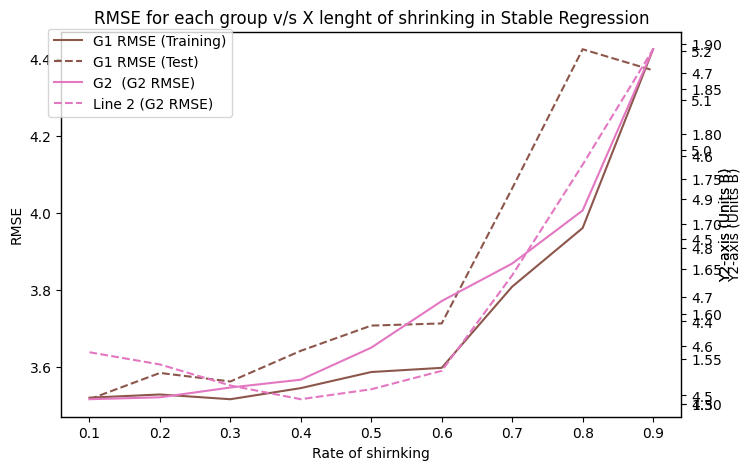

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.54095360639701
RMSE group 1 (sex_M=1):  3.274253196392471
RMSE group 2 (sex_M=0):  1.557356657105606
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.33818345773793
RMSE group 1 (sex_M=1):  4.205619764045391
RMSE group 2 (sex_M=0):  4.453449558738179
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.554785024

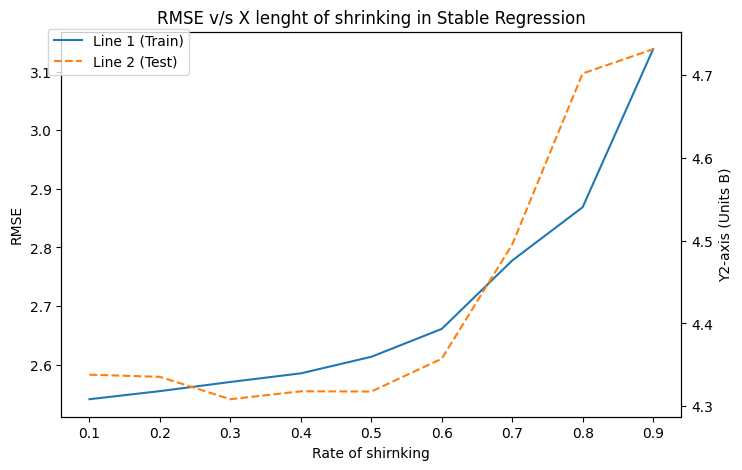

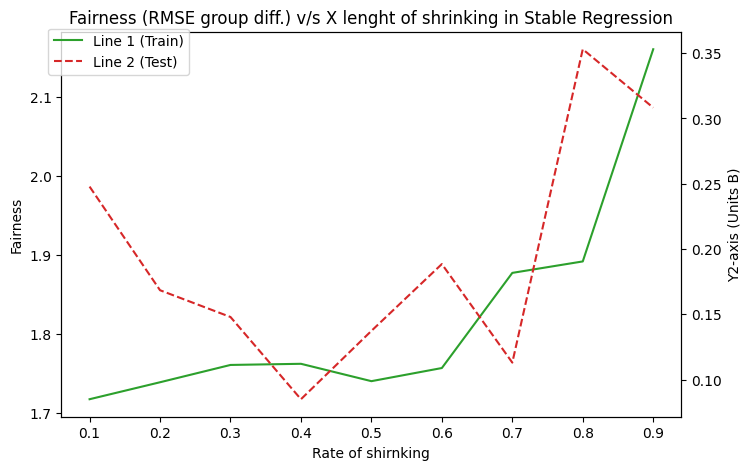

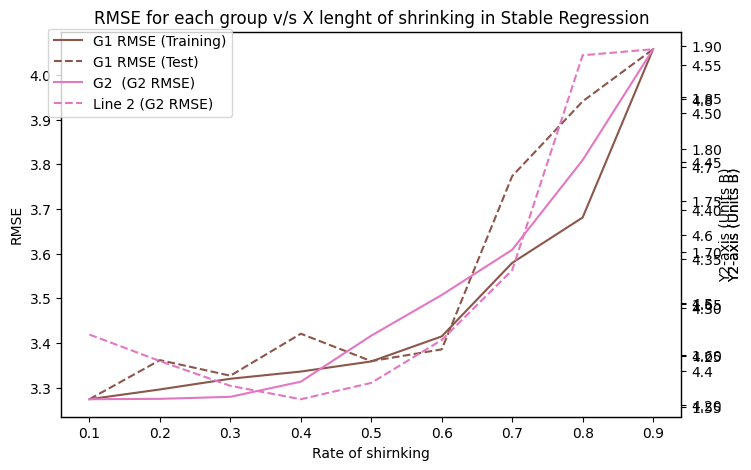

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.441107223522634
RMSE group 1 (sex_M=1):  3.0889550116383275
RMSE group 2 (sex_M=0):  1.6038364746071345
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.237413597987326
RMSE group 1 (sex_M=1):  4.117780082155714
RMSE group 2 (sex_M=0):  4.341660768401837
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.45385

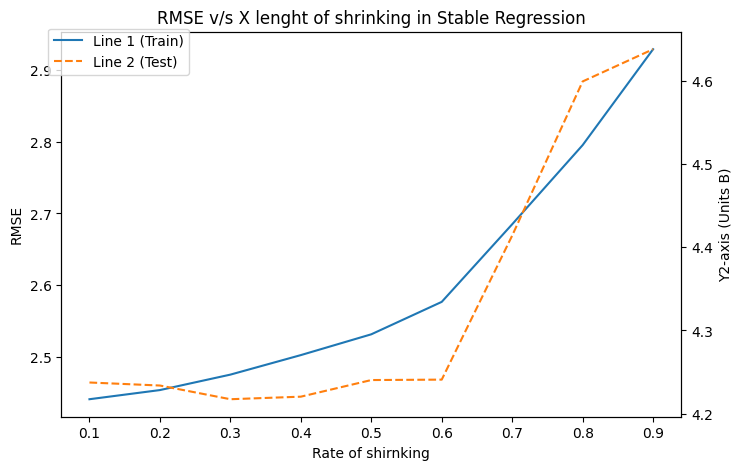

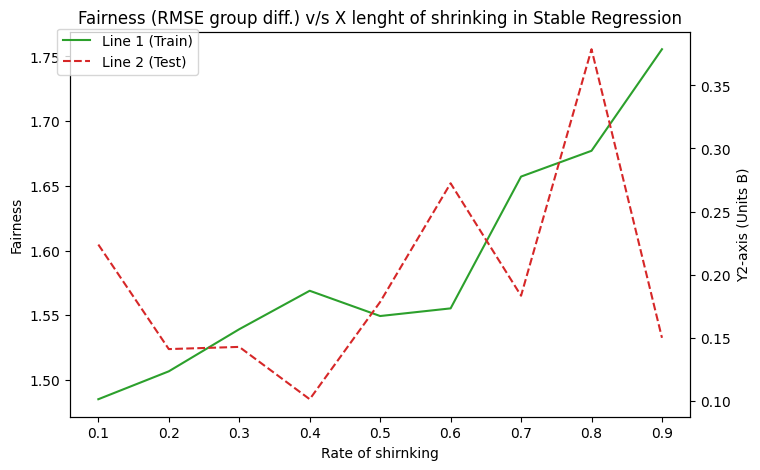

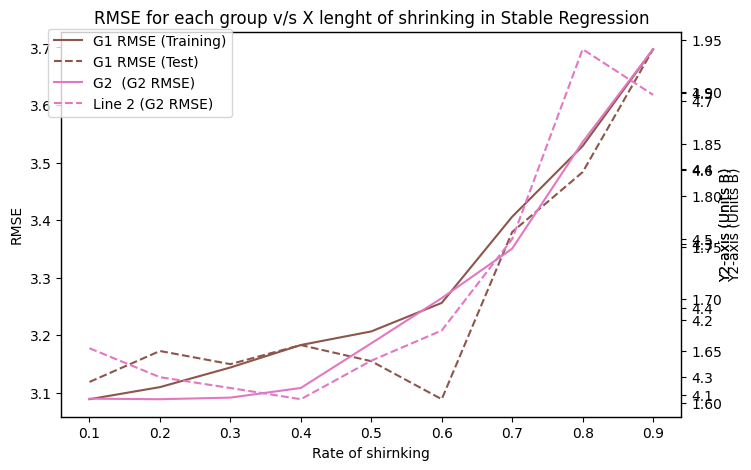

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.361402821884416
RMSE group 1 (sex_M=1):  2.9321268714625055
RMSE group 2 (sex_M=0):  1.6493324210141256
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.151584754296664
RMSE group 1 (sex_M=1):  4.041425835851589
RMSE group 2 (sex_M=0):  4.247727117450719
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.37323

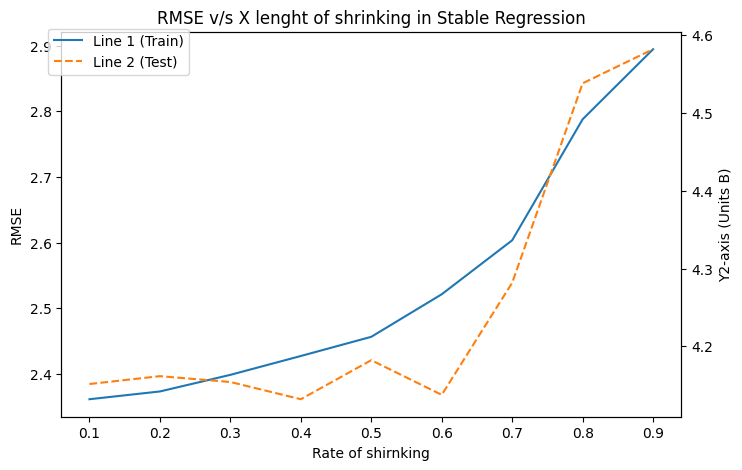

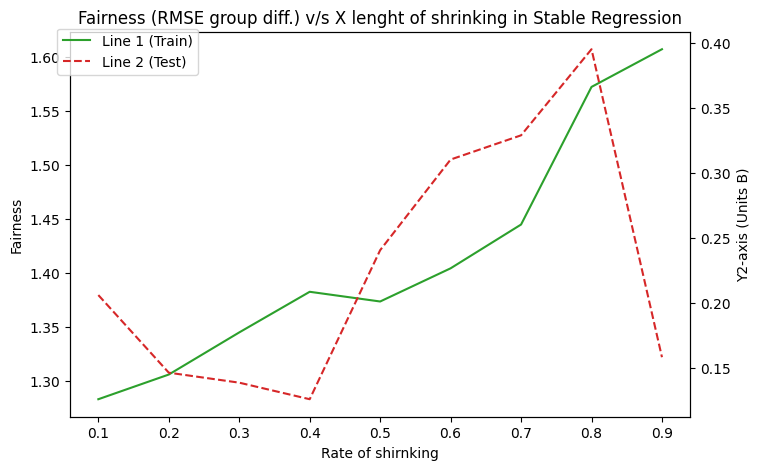

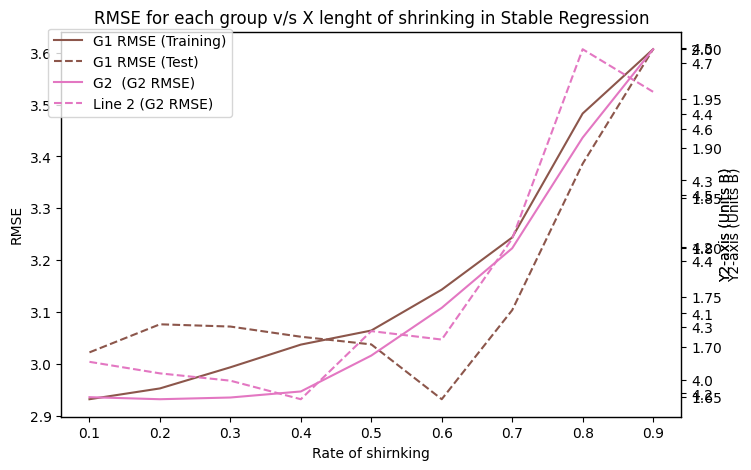

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.299604111261259
RMSE group 1 (sex_M=1):  2.8020081903313994
RMSE group 2 (sex_M=0):  1.6927126674067292
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.082519368052496
RMSE group 1 (sex_M=1):  3.977071390240545
RMSE group 2 (sex_M=0):  4.174610424475604
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.30785

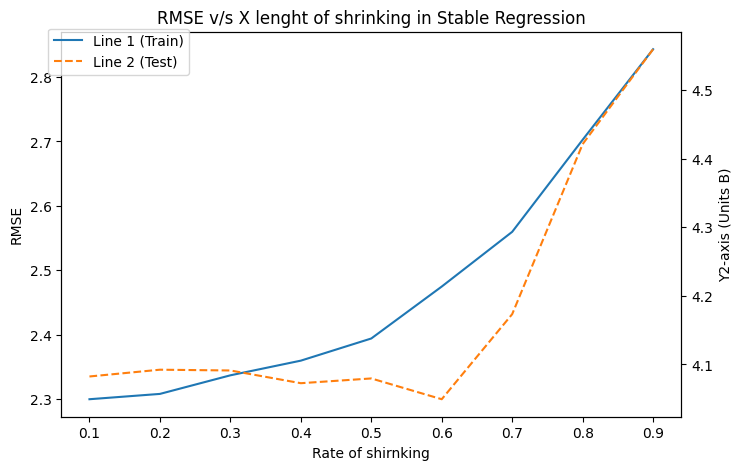

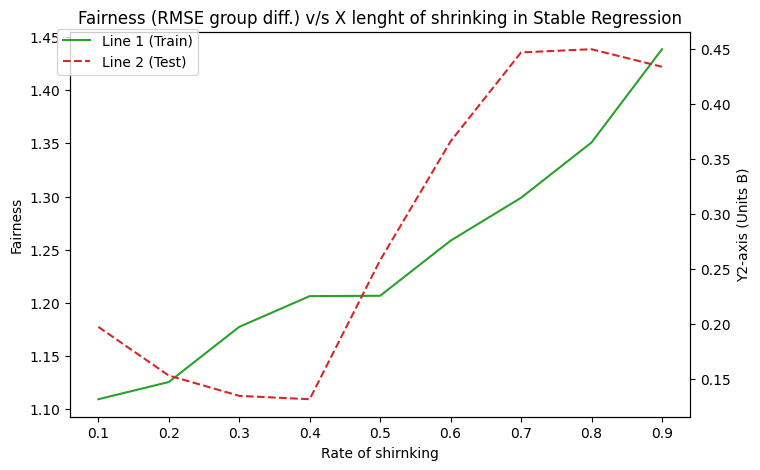

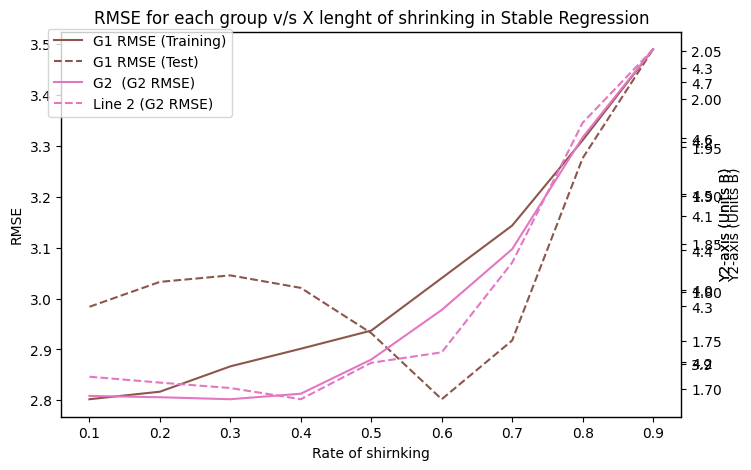

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.250072344669869
RMSE group 1 (sex_M=1):  2.690138617072574
RMSE group 2 (sex_M=0):  1.7342713352778687
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.023805625499534
RMSE group 1 (sex_M=1):  3.9252672057077436
RMSE group 2 (sex_M=0):  4.109969501803746
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.25538

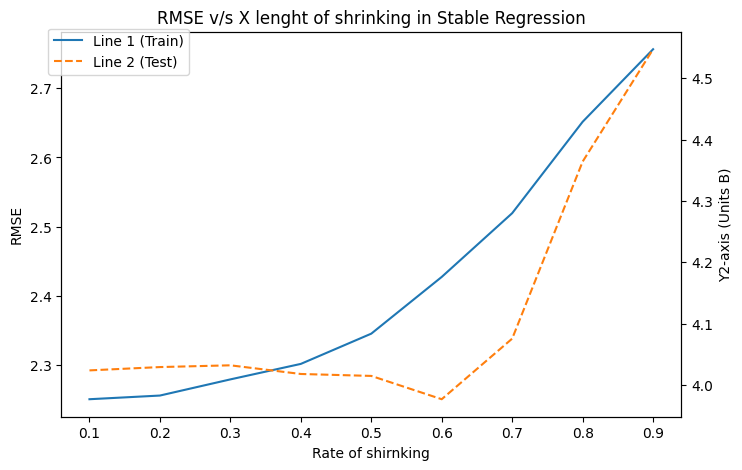

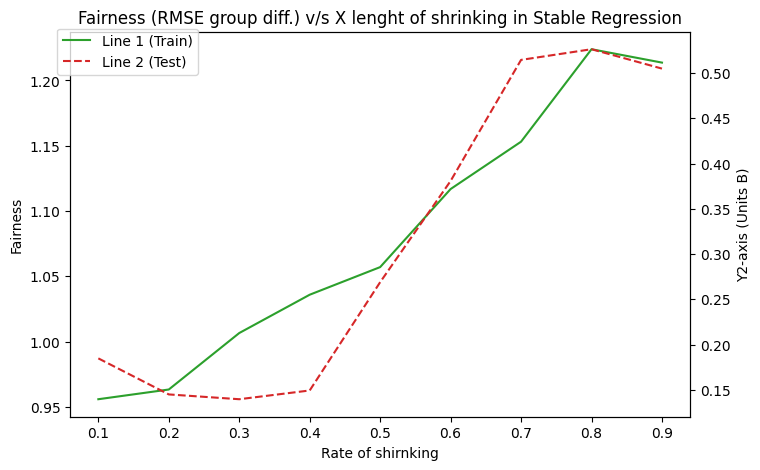

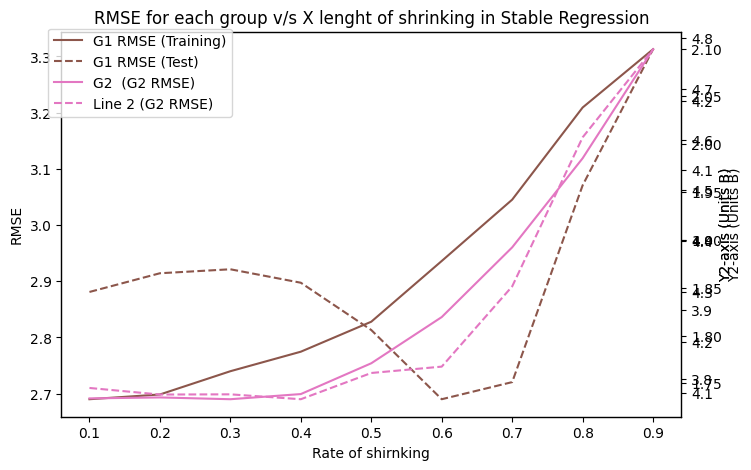

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.211433003085859
RMSE group 1 (sex_M=1):  2.596022941083082
RMSE group 2 (sex_M=0):  1.772751651456645
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.9730078465657868
RMSE group 1 (sex_M=1):  3.8771509299711275
RMSE group 2 (sex_M=0):  4.0568551463135725
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.2165

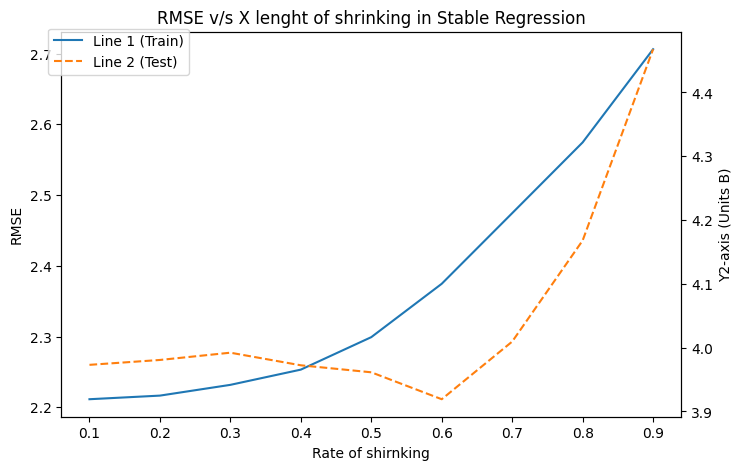

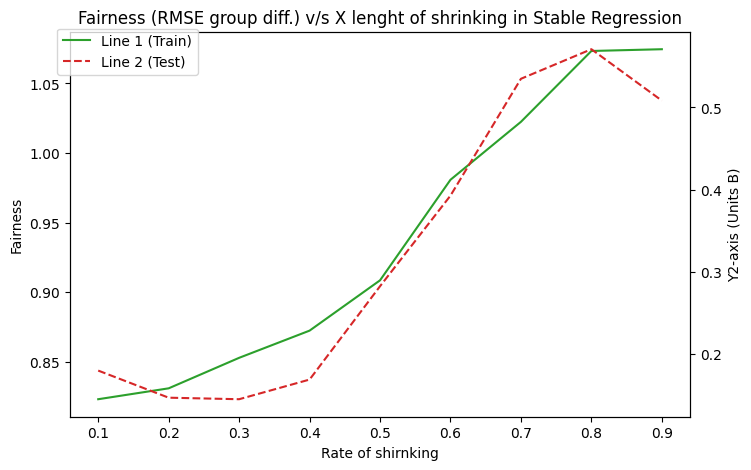

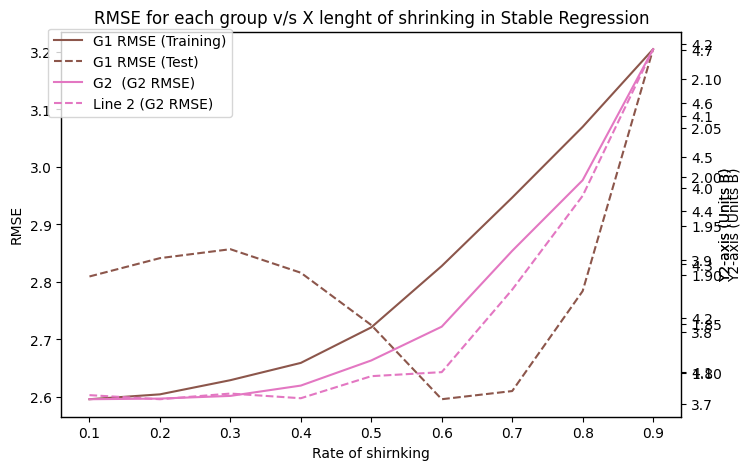

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1783126584204657
RMSE group 1 (sex_M=1):  2.508085563486086
RMSE group 2 (sex_M=0):  1.8122128802219708
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.9306324038594416
RMSE group 1 (sex_M=1):  3.840683040521931
RMSE group 2 (sex_M=0):  4.009403247970669
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1847

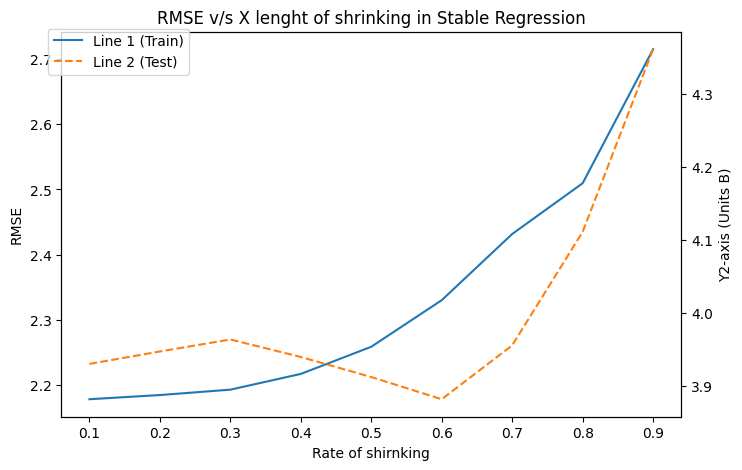

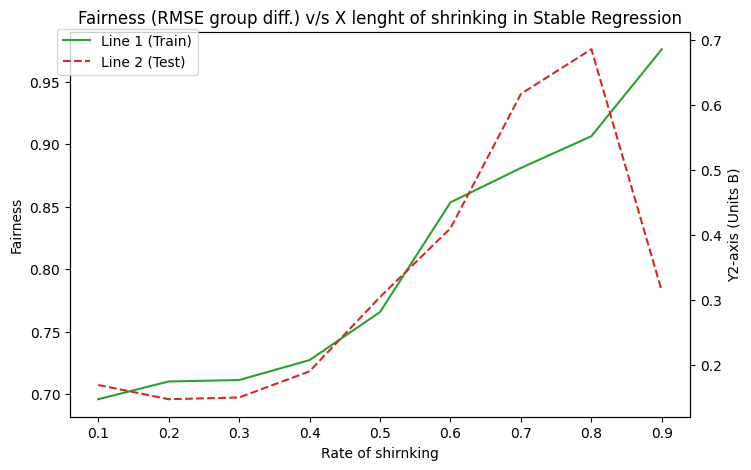

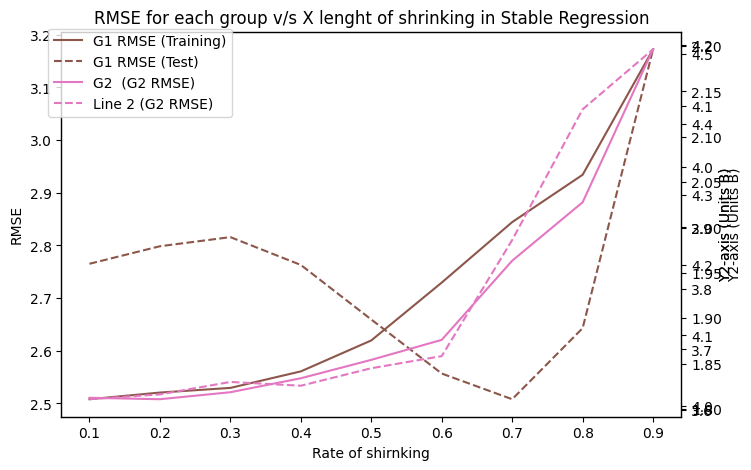

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1517122895731817
RMSE group 1 (sex_M=1):  2.4305930523483874
RMSE group 2 (sex_M=0):  1.8498202733157025
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.89838268865704
RMSE group 1 (sex_M=1):  3.8056812935195277
RMSE group 2 (sex_M=0):  3.9794960095244294
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.157

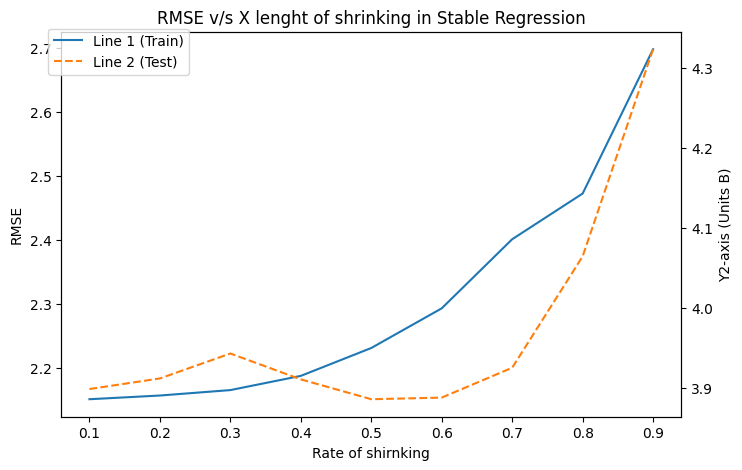

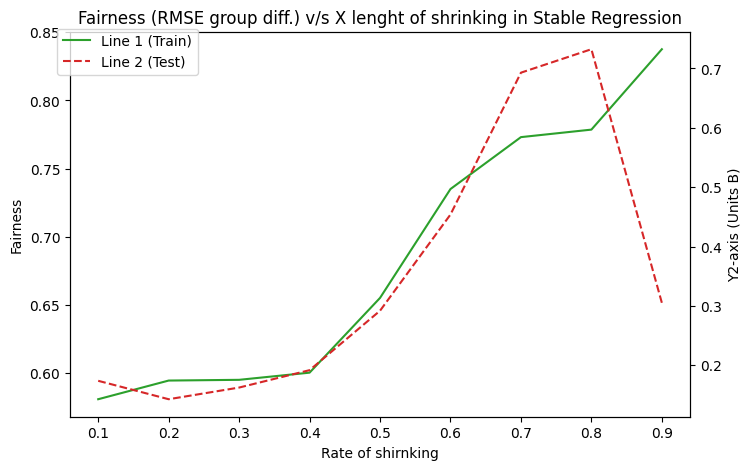

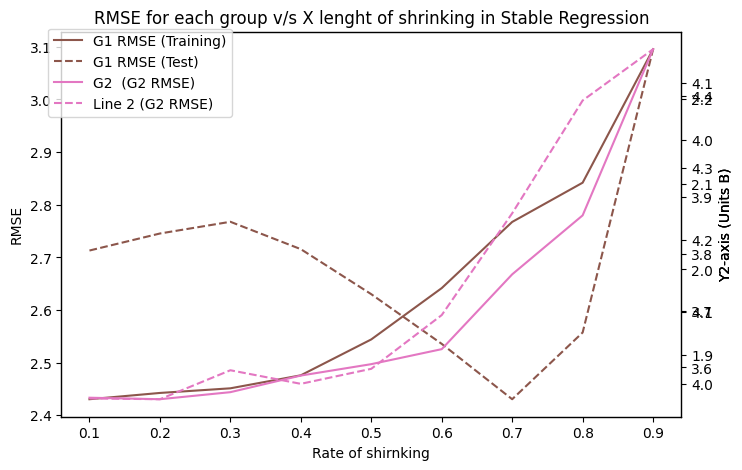

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1300229209772192
RMSE group 1 (sex_M=1):  2.359787382064889
RMSE group 2 (sex_M=0):  1.887276969880565
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.8692430259902344
RMSE group 1 (sex_M=1):  3.778580109226808
RMSE group 2 (sex_M=0):  3.948598335445058
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.13325

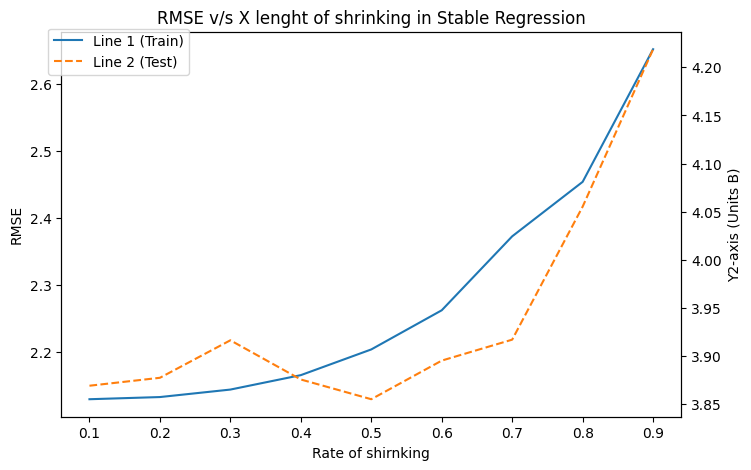

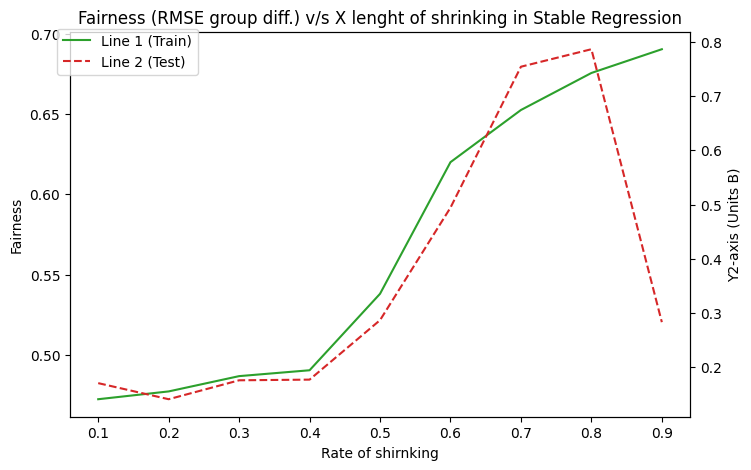

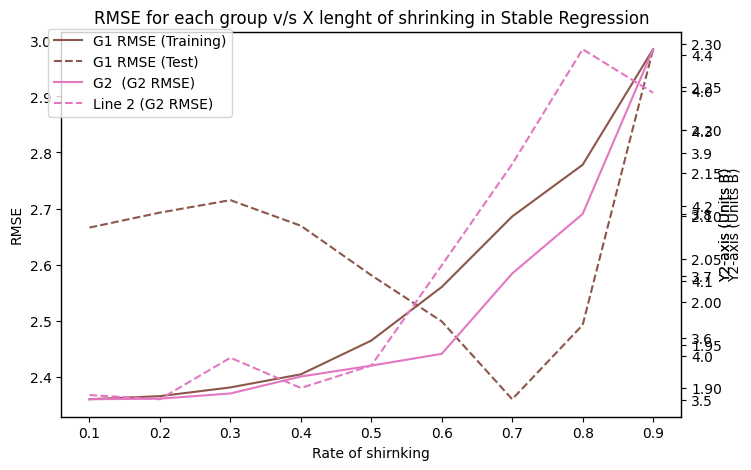

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.112729181110006
RMSE group 1 (sex_M=1):  2.2962868473110745
RMSE group 2 (sex_M=0):  1.923167951430764
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.8423374313237053
RMSE group 1 (sex_M=1):  3.7489272848406823
RMSE group 2 (sex_M=0):  3.9240305629614474
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.115

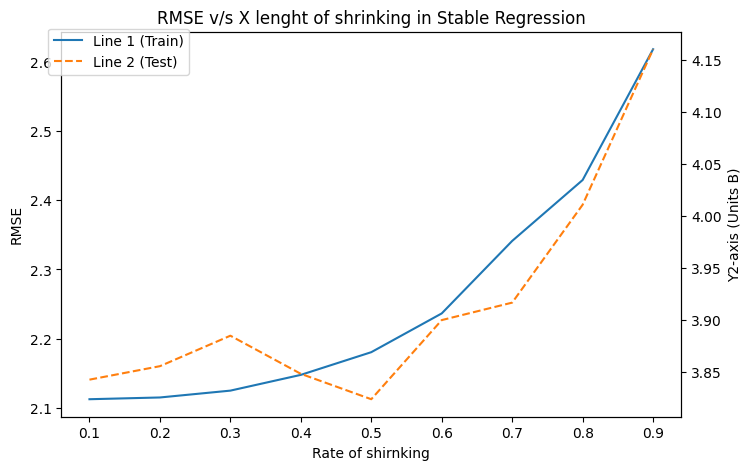

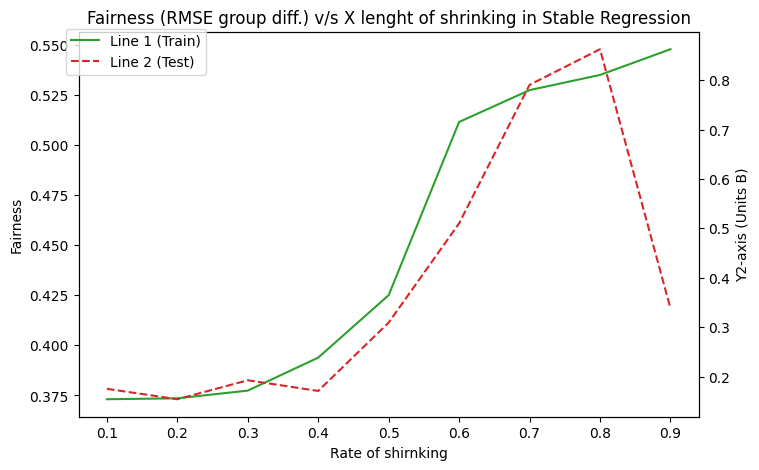

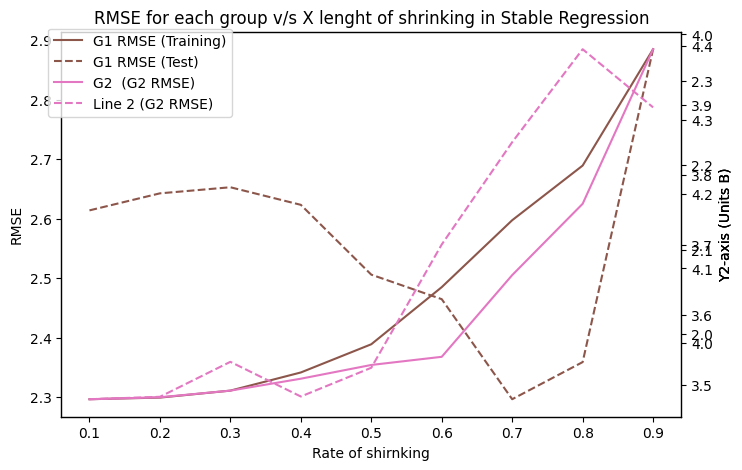

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0986667308635956
RMSE group 1 (sex_M=1):  2.23668527700543
RMSE group 2 (sex_M=0):  1.9592768622314642
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.817794115868505
RMSE group 1 (sex_M=1):  3.7214656483382913
RMSE group 2 (sex_M=0):  3.901967500214094
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.10052

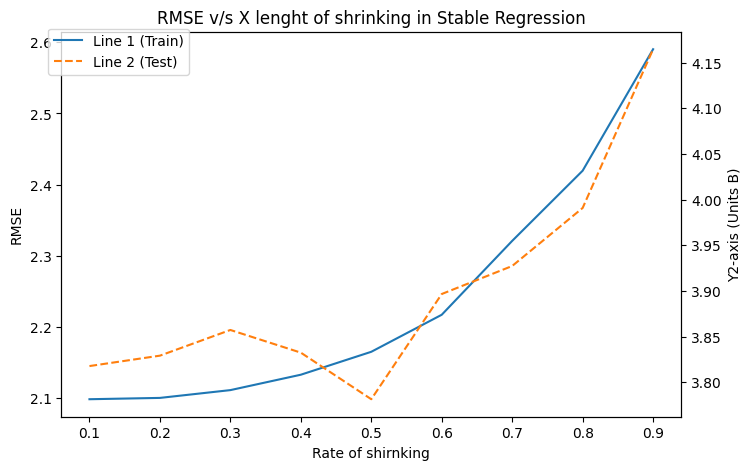

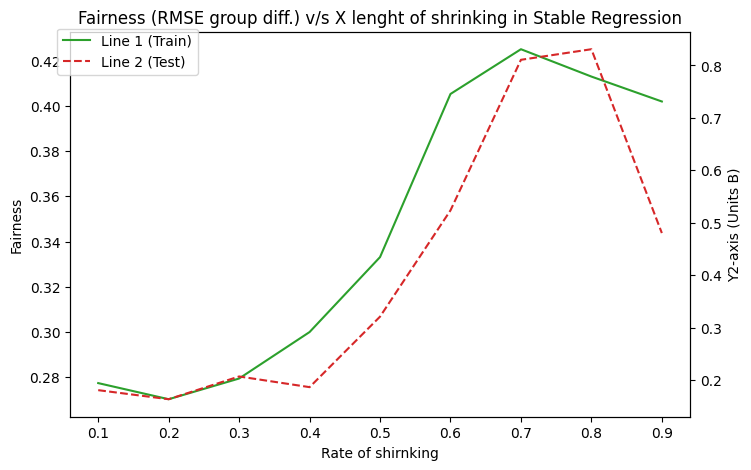

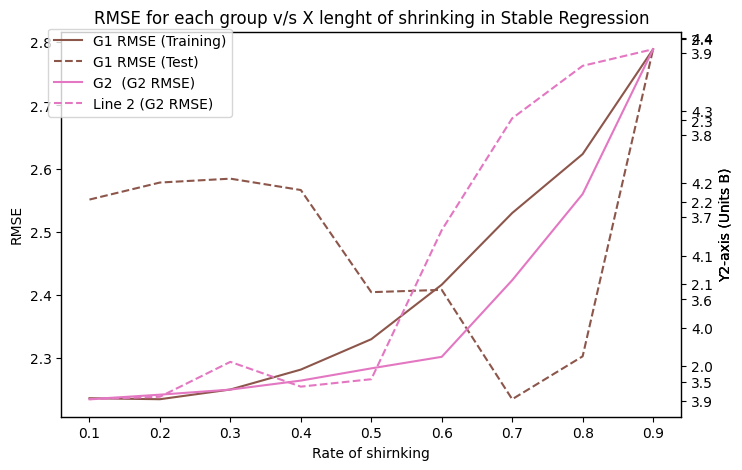

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0874444257807325
RMSE group 1 (sex_M=1):  2.179723592767511
RMSE group 2 (sex_M=0):  1.9962935295917308
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.7966986632901967
RMSE group 1 (sex_M=1):  3.697269861912505
RMSE group 2 (sex_M=0):  3.883504055910236
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0895

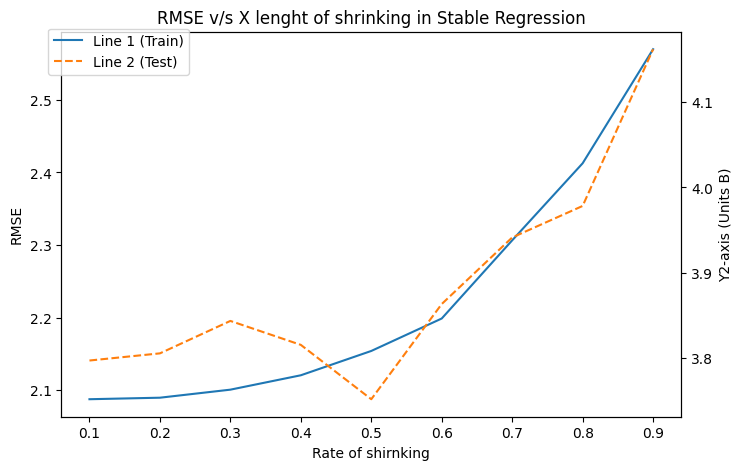

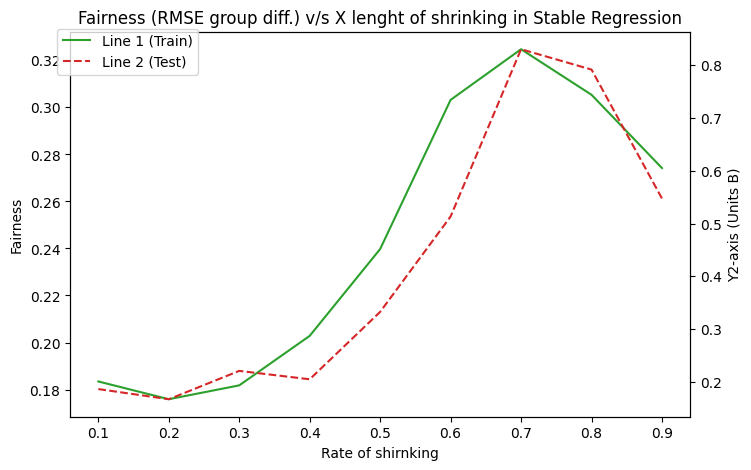

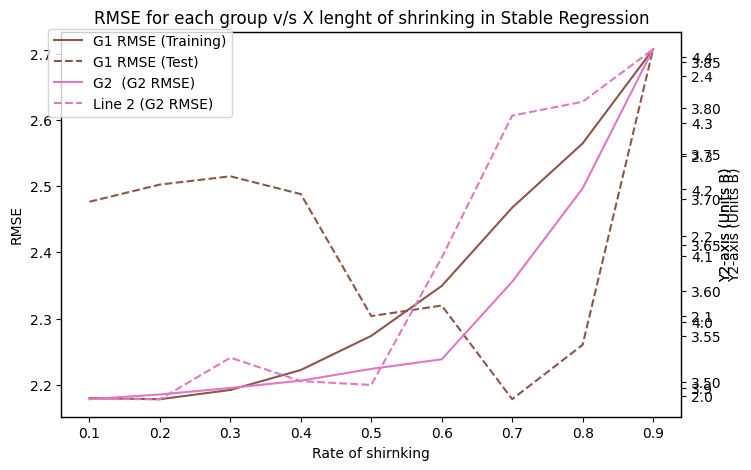

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.079120582997344
RMSE group 1 (sex_M=1):  2.1258393795697206
RMSE group 2 (sex_M=0):  2.0339702862929703
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.781469412027231
RMSE group 1 (sex_M=1):  3.6811272921681346
RMSE group 2 (sex_M=0):  3.8690439762164948
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.081

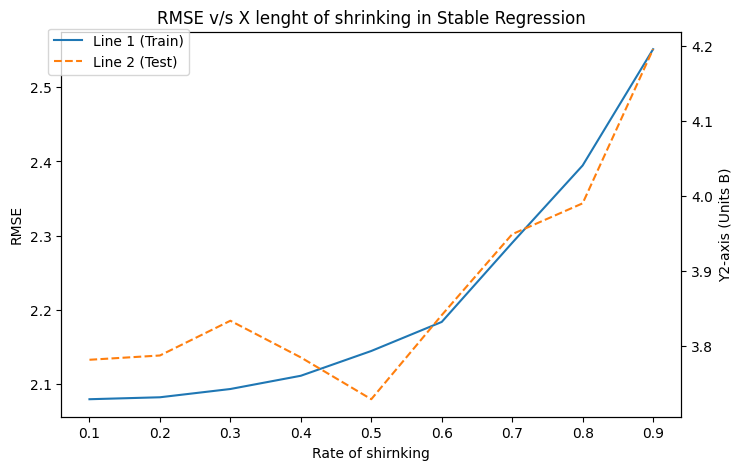

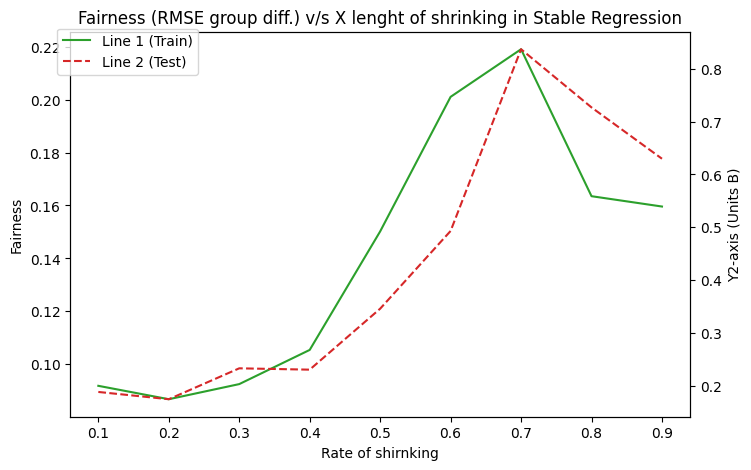

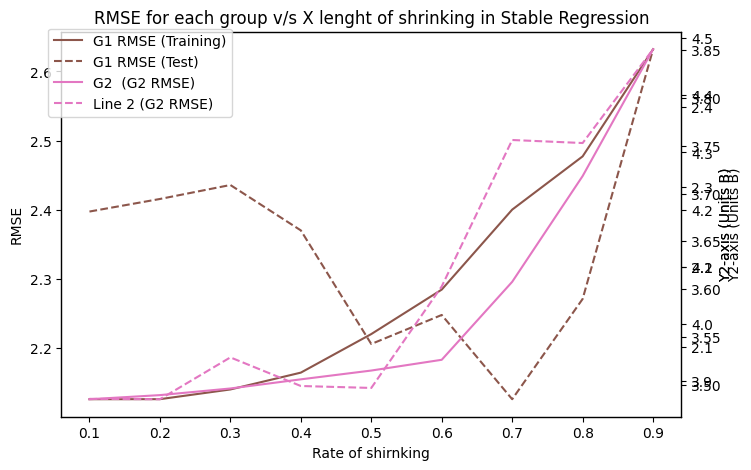

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.073637897057517
RMSE group 1 (sex_M=1):  2.076461993951242
RMSE group 2 (sex_M=0):  2.0709647020036472
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.771043407109545
RMSE group 1 (sex_M=1):  3.6668115946332205
RMSE group 2 (sex_M=0):  3.8619196073553246
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0761

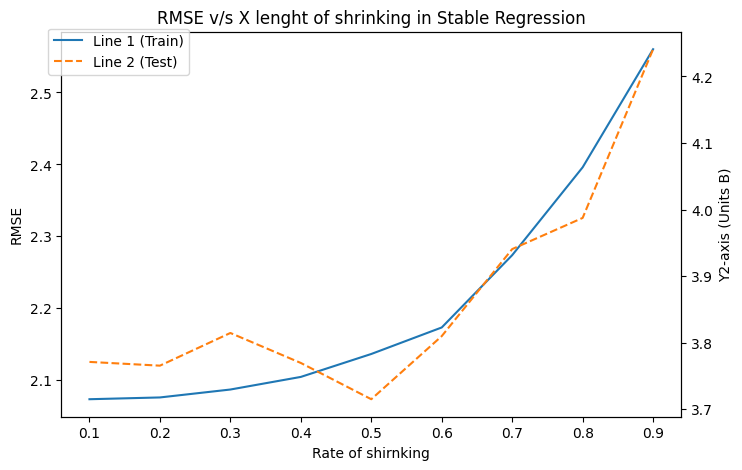

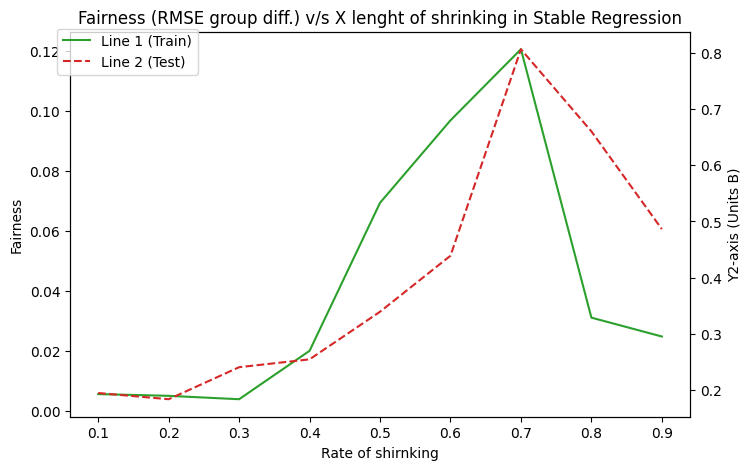

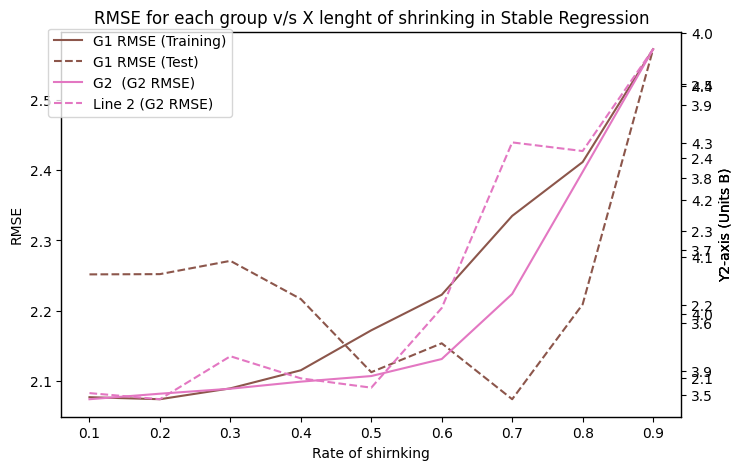

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0705905925219033
RMSE group 1 (sex_M=1):  2.030212508878234
RMSE group 2 (sex_M=0):  2.108049495539225
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.760506118826018
RMSE group 1 (sex_M=1):  3.652582827532029
RMSE group 2 (sex_M=0):  3.854508524930755
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.073329

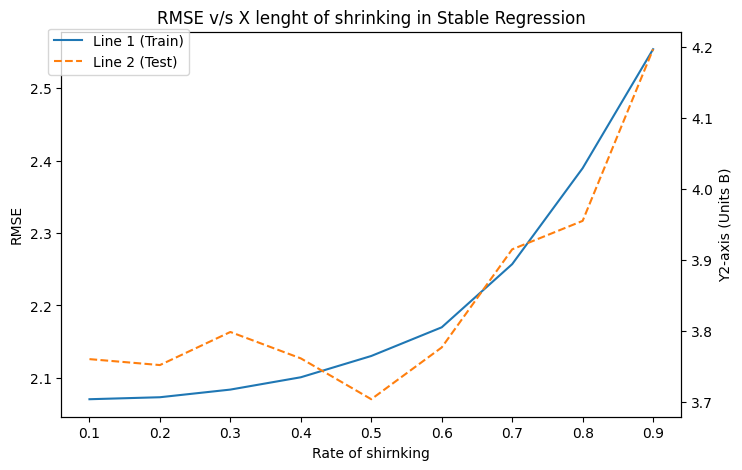

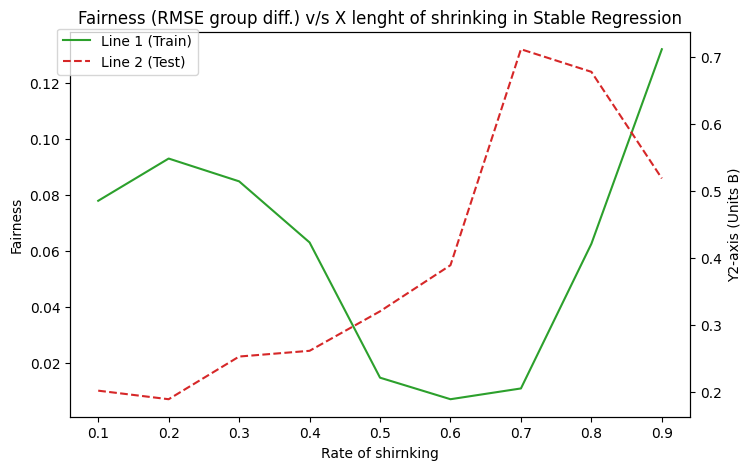

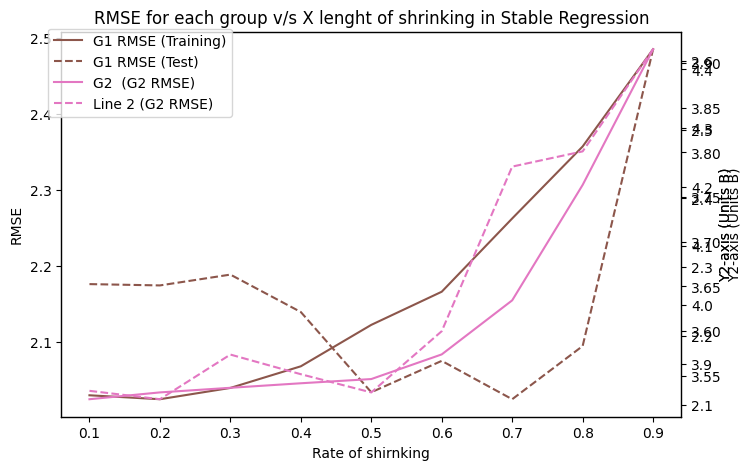

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.069586061253435
RMSE group 1 (sex_M=1):  1.9857110422486224
RMSE group 2 (sex_M=0):  2.1458618974748718
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.7521905017000385
RMSE group 1 (sex_M=1):  3.6353591680224002
RMSE group 2 (sex_M=0):  3.8537226802473983
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.07

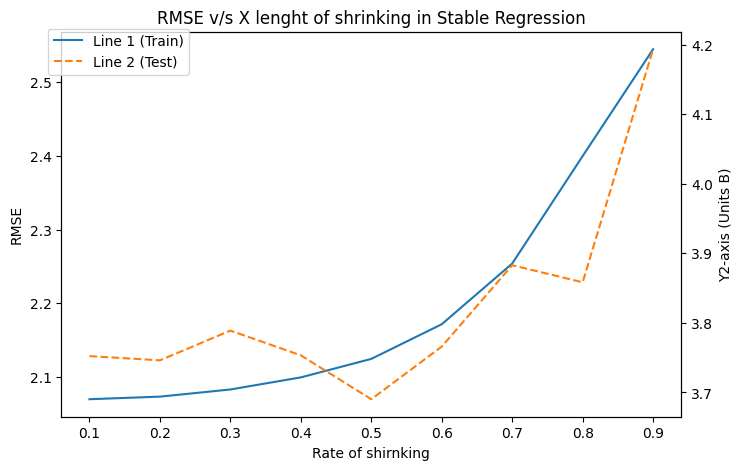

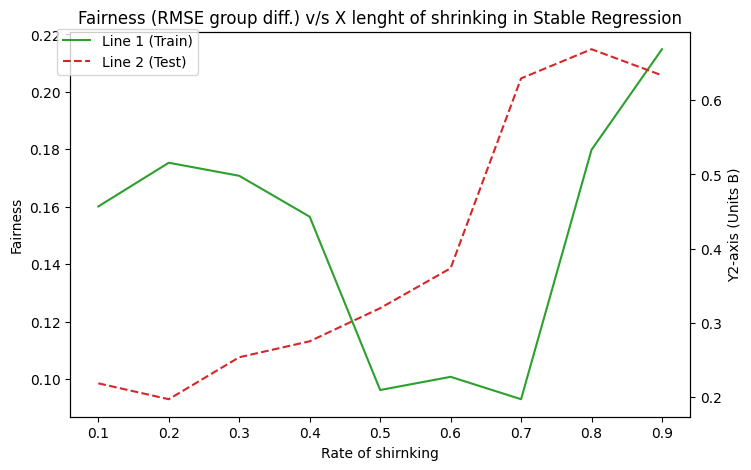

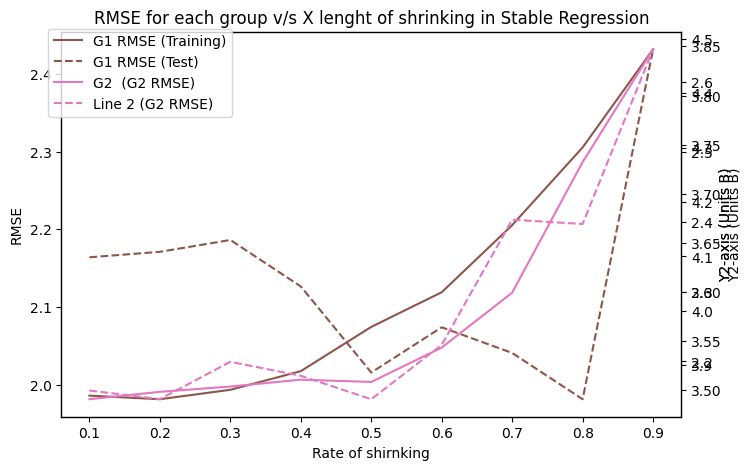

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0706336296998775
RMSE group 1 (sex_M=1):  1.9426068636291447
RMSE group 2 (sex_M=0):  2.184771675108594
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.748252255850641
RMSE group 1 (sex_M=1):  3.6243106816464485
RMSE group 2 (sex_M=0):  3.855771780583779
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0753

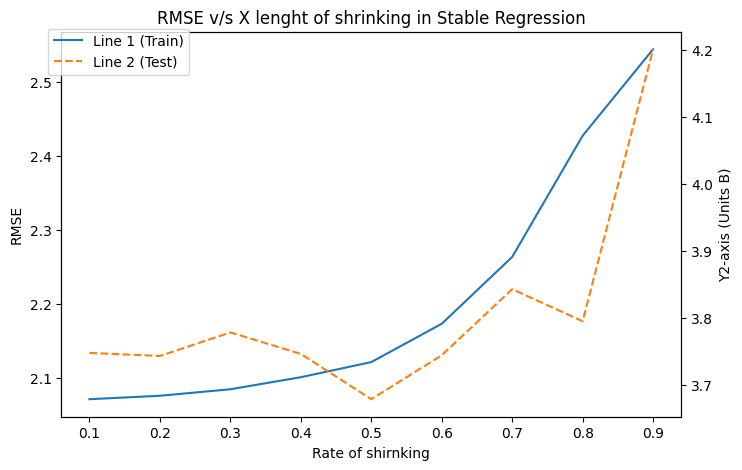

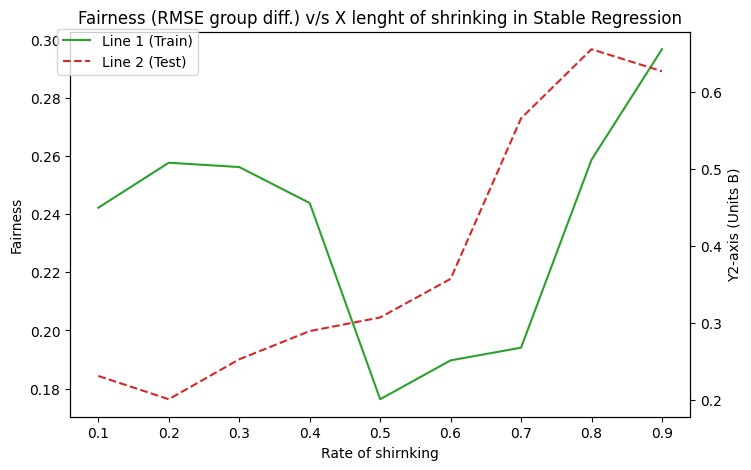

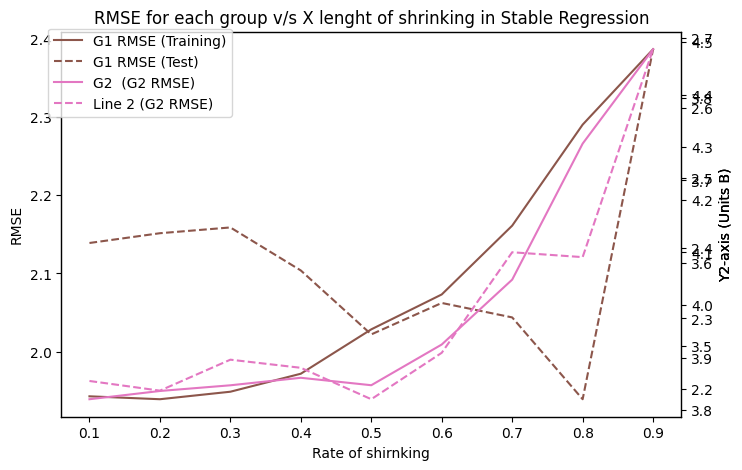

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0739422044689633
RMSE group 1 (sex_M=1):  1.9013236943351892
RMSE group 2 (sex_M=0):  2.224840204820949
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.7443334770226464
RMSE group 1 (sex_M=1):  3.615372985091991
RMSE group 2 (sex_M=0):  3.85606510492394
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.07929

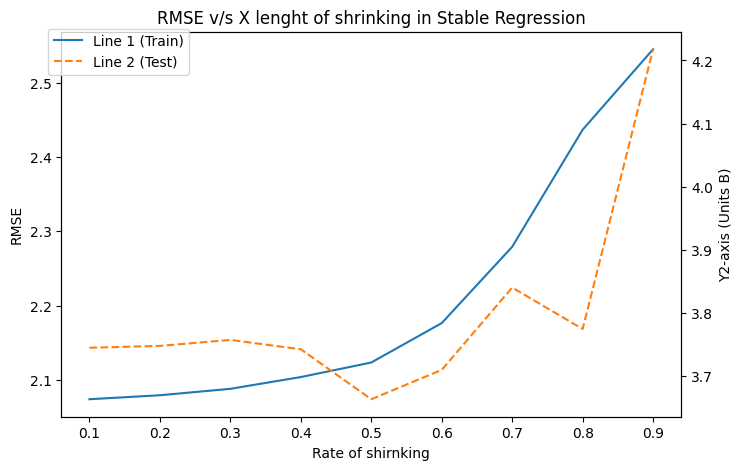

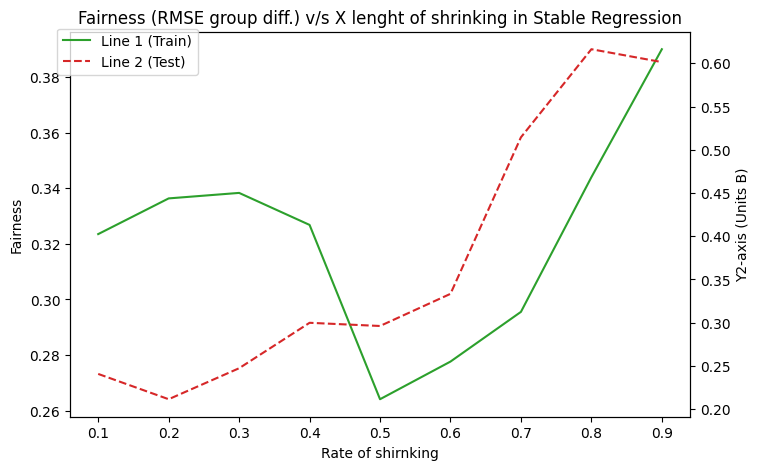

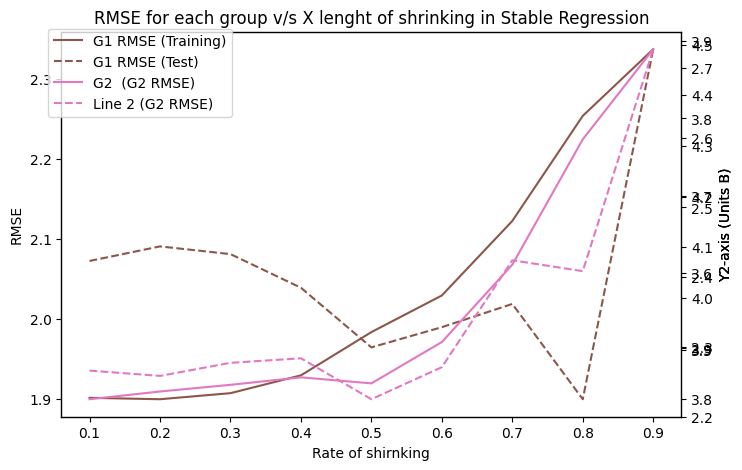

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0794873487437155
RMSE group 1 (sex_M=1):  1.8607330003554376
RMSE group 2 (sex_M=0):  2.266951831532758
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.7408677267224557
RMSE group 1 (sex_M=1):  3.6054451065915276
RMSE group 2 (sex_M=0):  3.8580080998731465
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.08

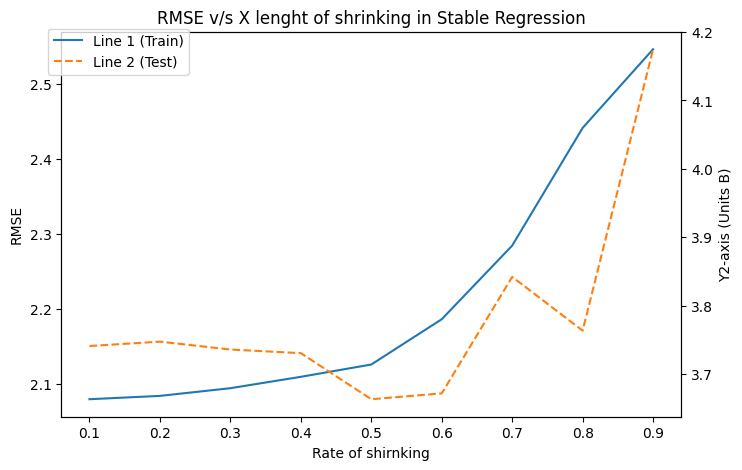

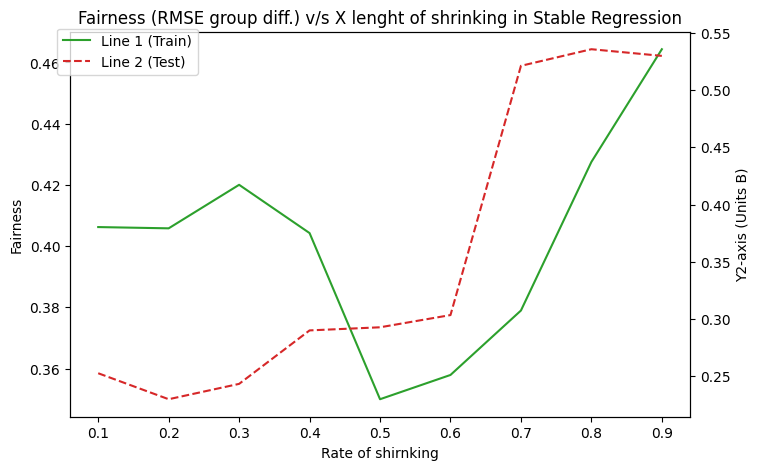

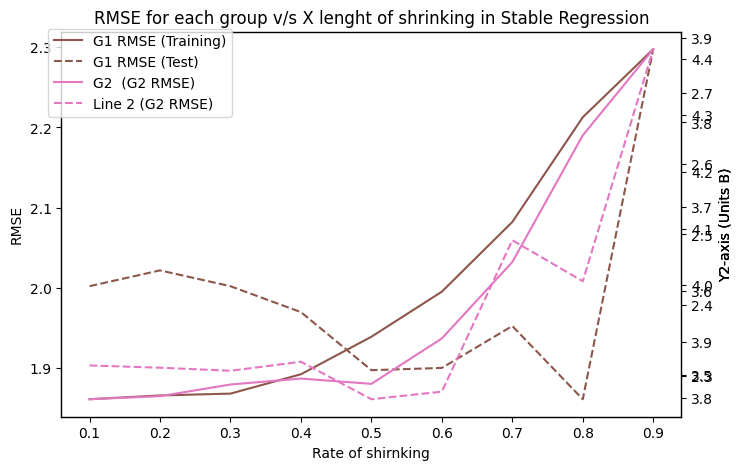

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.087662498190593
RMSE group 1 (sex_M=1):  1.820164478053836
RMSE group 2 (sex_M=0):  2.31225082423431
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.739744502115289
RMSE group 1 (sex_M=1):  3.598479891447214
RMSE group 2 (sex_M=0):  3.861761418971686
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.09115489

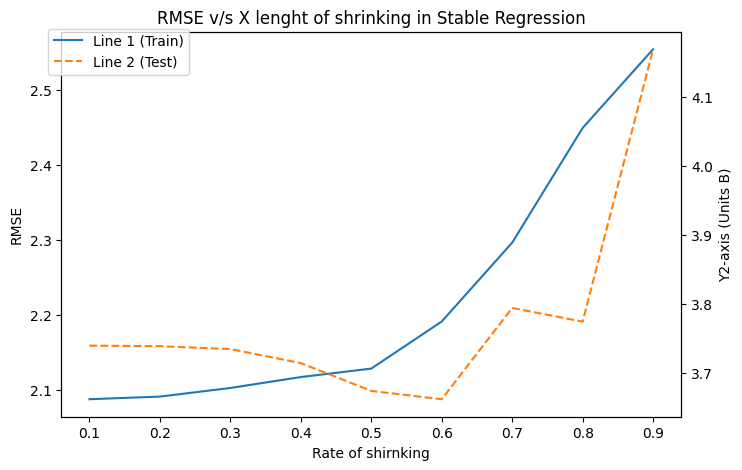

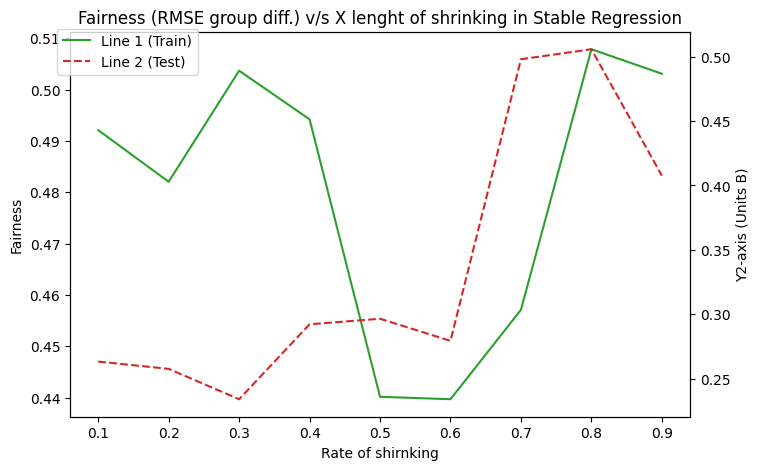

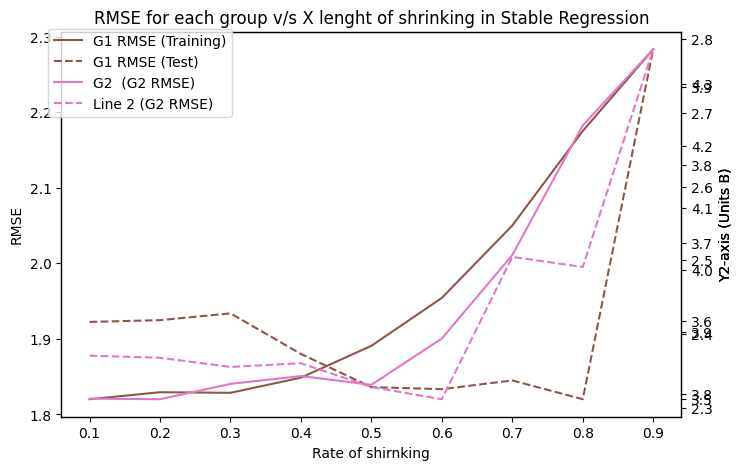

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.0975910733281165
RMSE group 1 (sex_M=1):  1.7825922573810546
RMSE group 2 (sex_M=0):  2.3569682849652214
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.745007632305017
RMSE group 1 (sex_M=1):  3.5962477702684756
RMSE group 2 (sex_M=0):  3.873268655997257
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.102

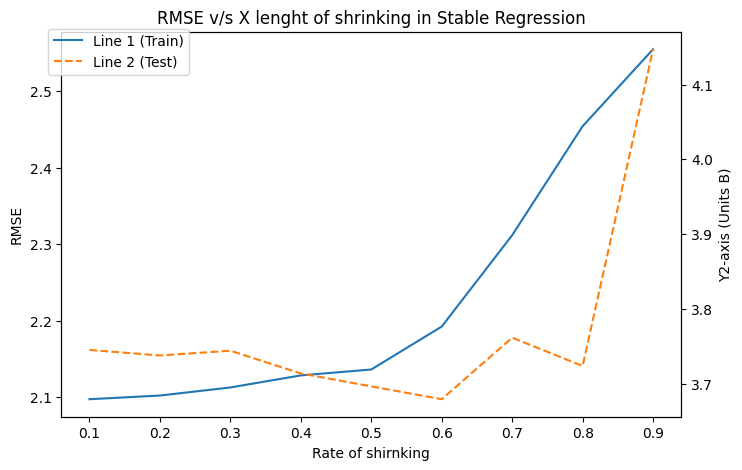

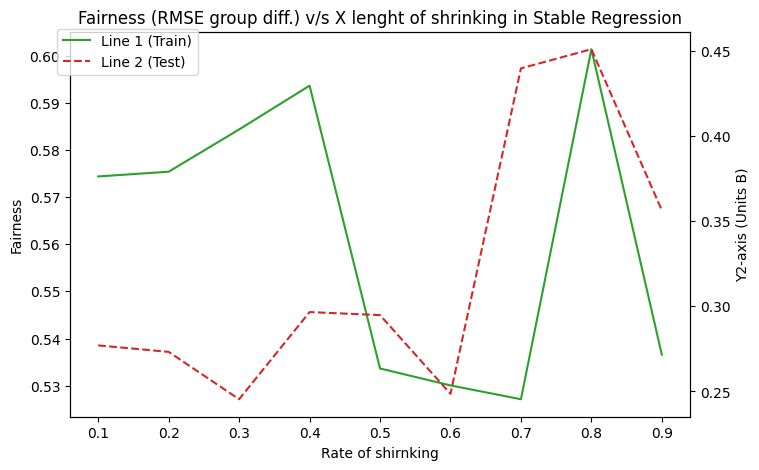

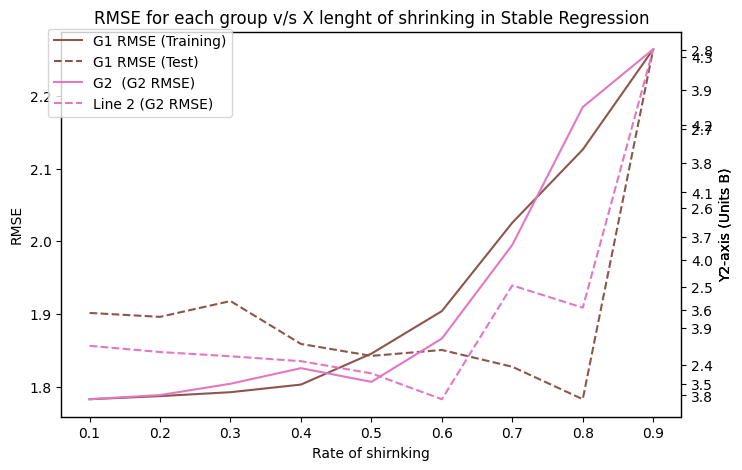

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.110754901782787
RMSE group 1 (sex_M=1):  1.7443953262412728
RMSE group 2 (sex_M=0):  2.406328823440965
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.753069535167278
RMSE group 1 (sex_M=1):  3.5963890882053975
RMSE group 2 (sex_M=0):  3.887908838781682
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.11681

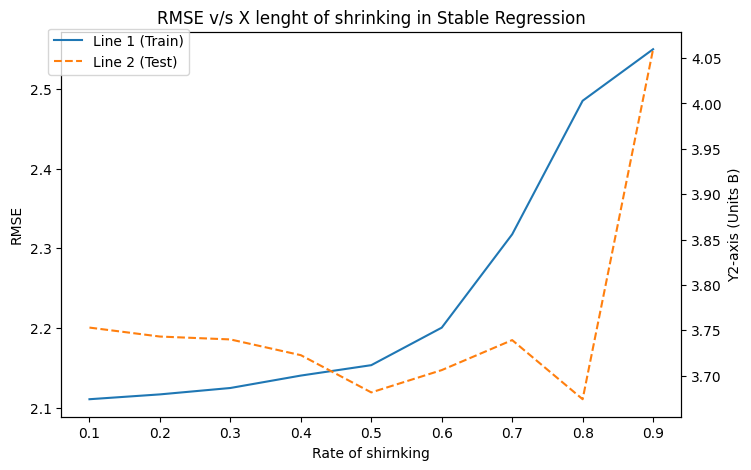

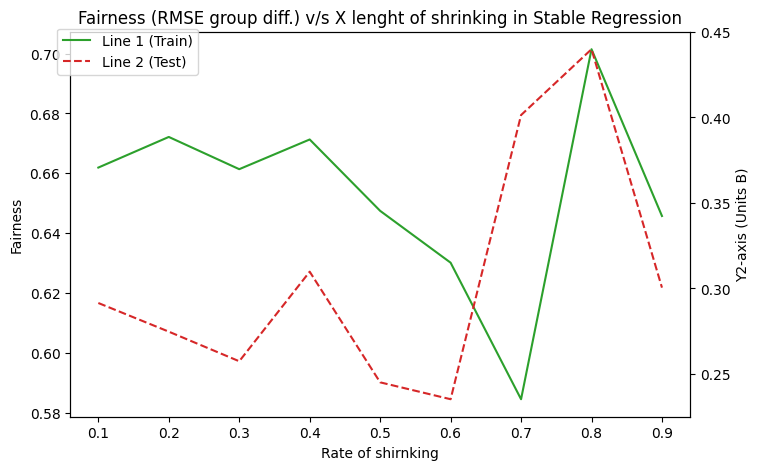

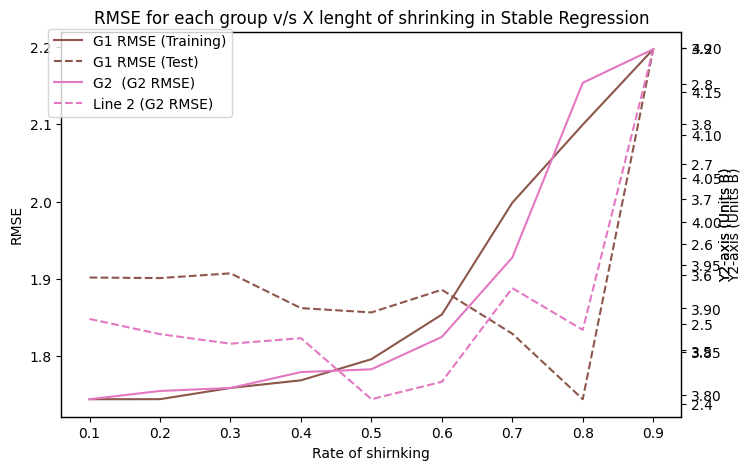

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1252409271305357
RMSE group 1 (sex_M=1):  1.70991060803799
RMSE group 2 (sex_M=0):  2.4540567367564625
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.765249360026812
RMSE group 1 (sex_M=1):  3.6026022315860255
RMSE group 2 (sex_M=0):  3.9050377078243907
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1319

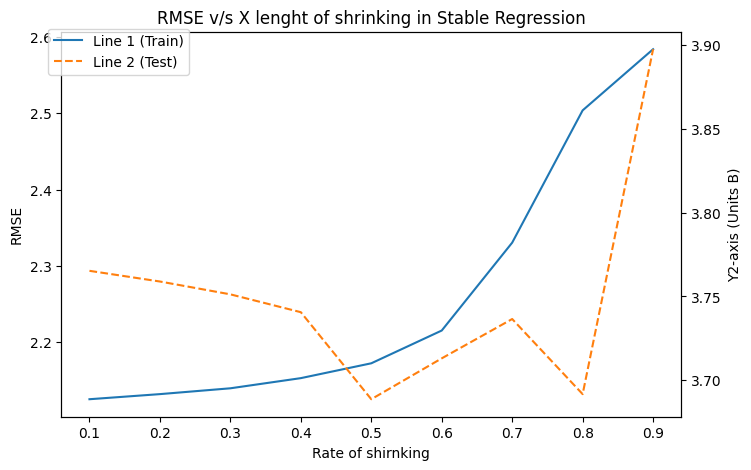

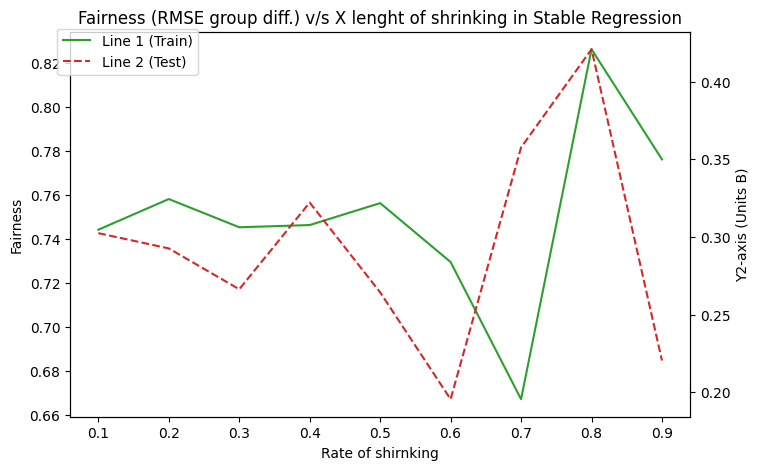

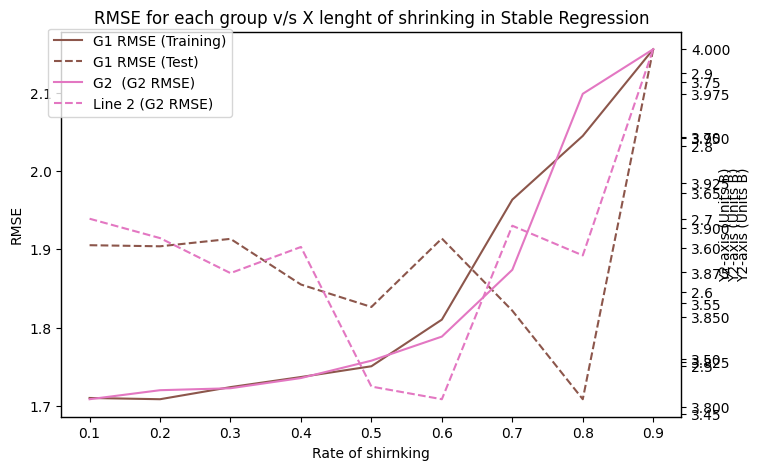

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1437064709161344
RMSE group 1 (sex_M=1):  1.6722742400240236
RMSE group 2 (sex_M=0):  2.509197524441455
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.7809529467852223
RMSE group 1 (sex_M=1):  3.6110151925786087
RMSE group 2 (sex_M=0):  3.926773581395512
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.148

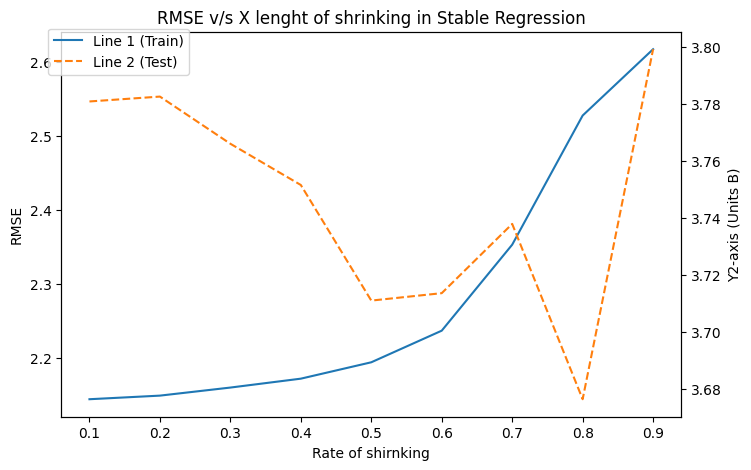

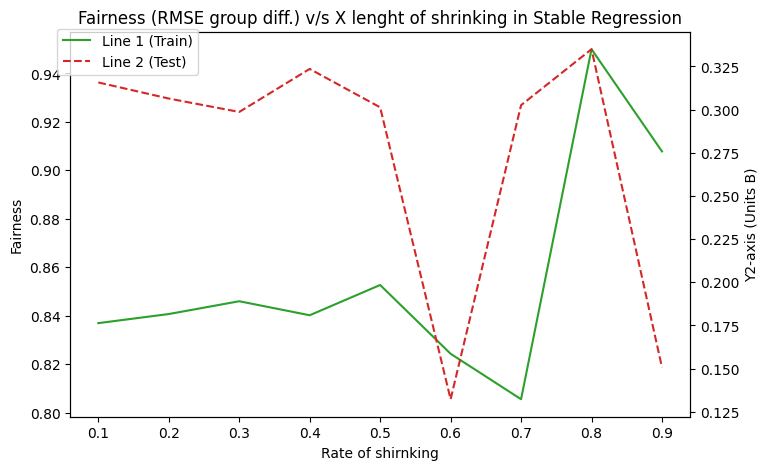

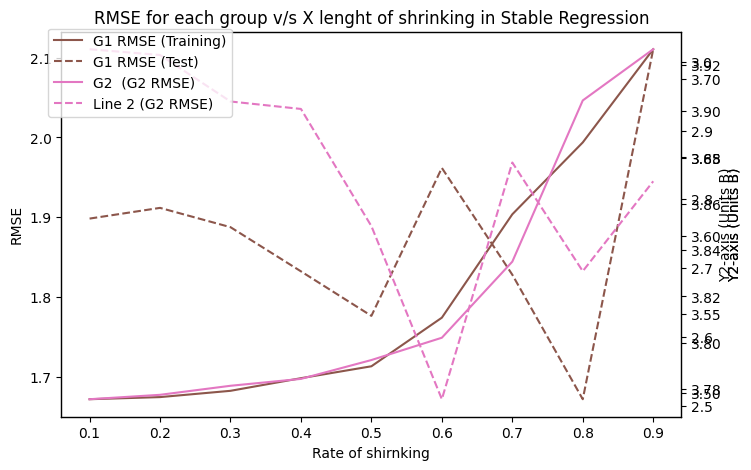

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.166687708994843
RMSE group 1 (sex_M=1):  1.6342443741089192
RMSE group 2 (sex_M=0):  2.570533225109134
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.8008376951608995
RMSE group 1 (sex_M=1):  3.622968258497632
RMSE group 2 (sex_M=0):  3.9532061313574034
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1684

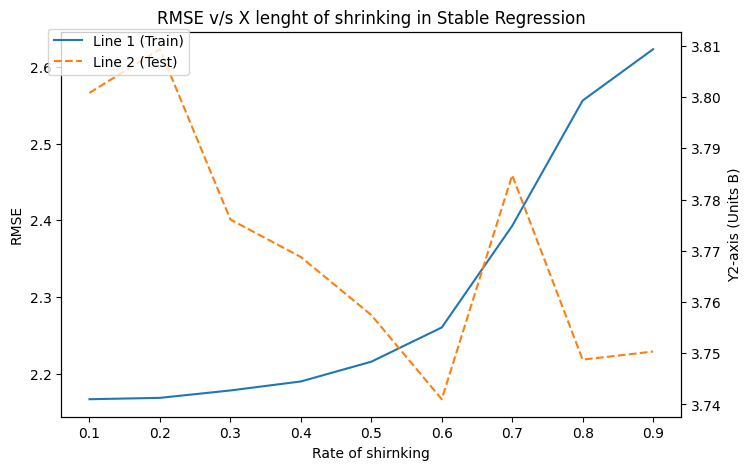

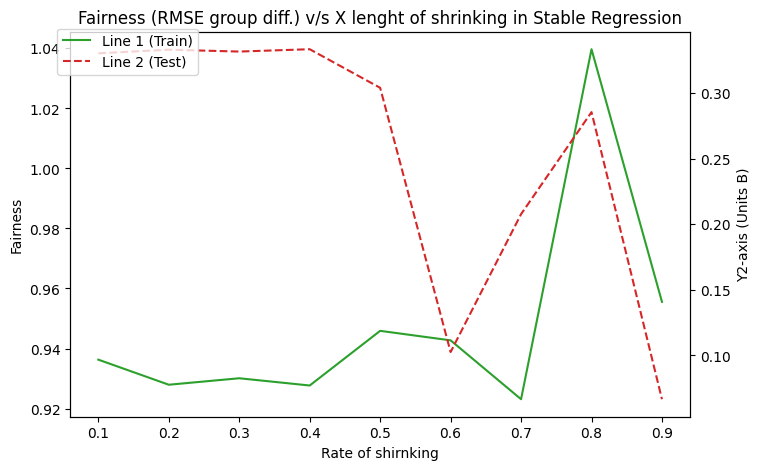

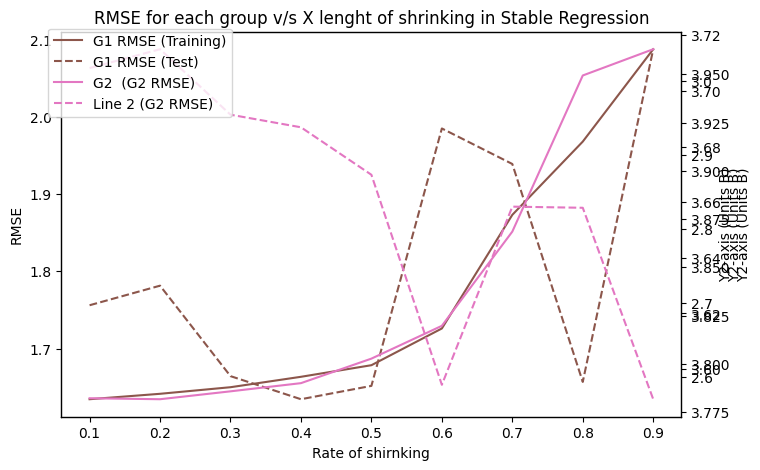

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.1932844981357498
RMSE group 1 (sex_M=1):  1.5972420817109096
RMSE group 2 (sex_M=0):  2.635574936050352
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.8293211269006084
RMSE group 1 (sex_M=1):  3.6405921970781785
RMSE group 2 (sex_M=0):  3.9906252924700625
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.19

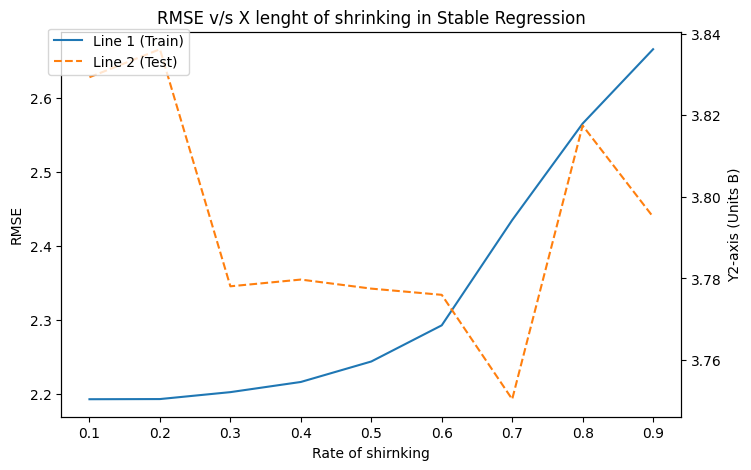

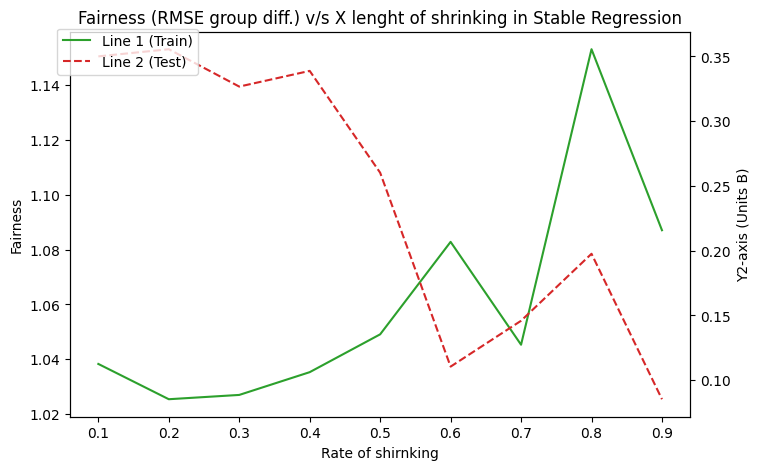

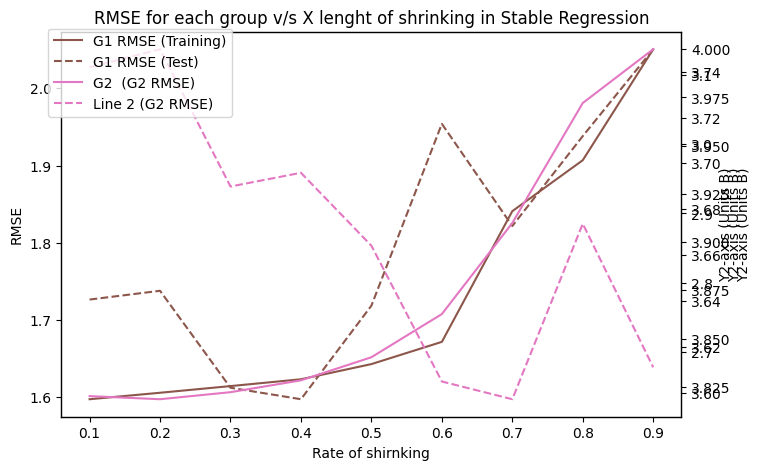

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.225530788440737
RMSE group 1 (sex_M=1):  1.5596240925543912
RMSE group 2 (sex_M=0):  2.70845050658136
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.858757968152316
RMSE group 1 (sex_M=1):  3.6600395303515687
RMSE group 2 (sex_M=0):  4.028257758834059
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.228337

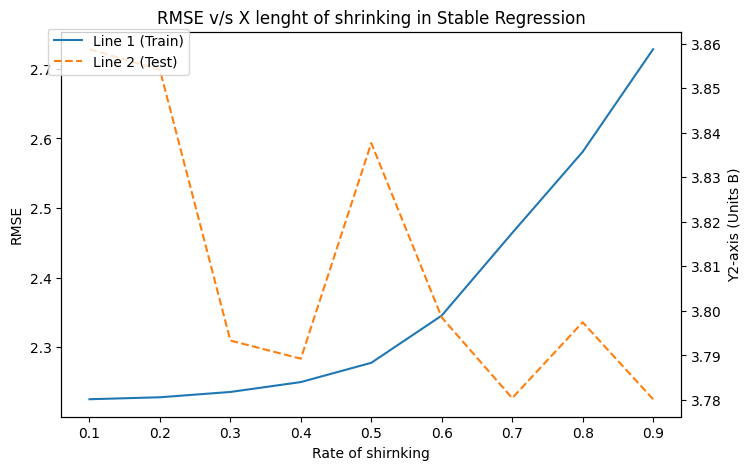

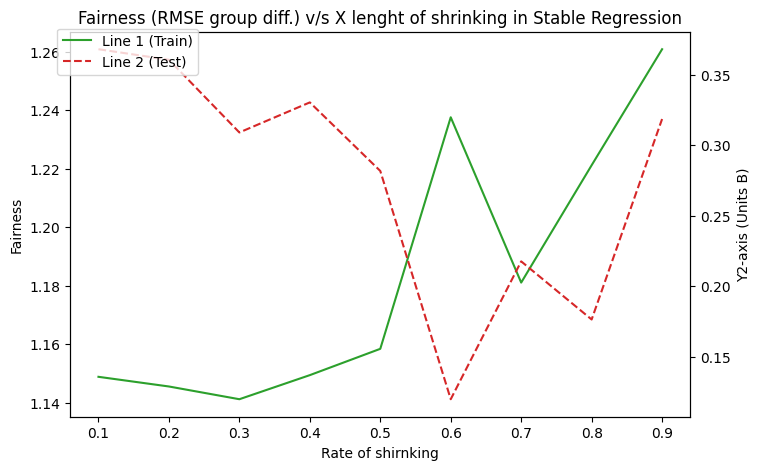

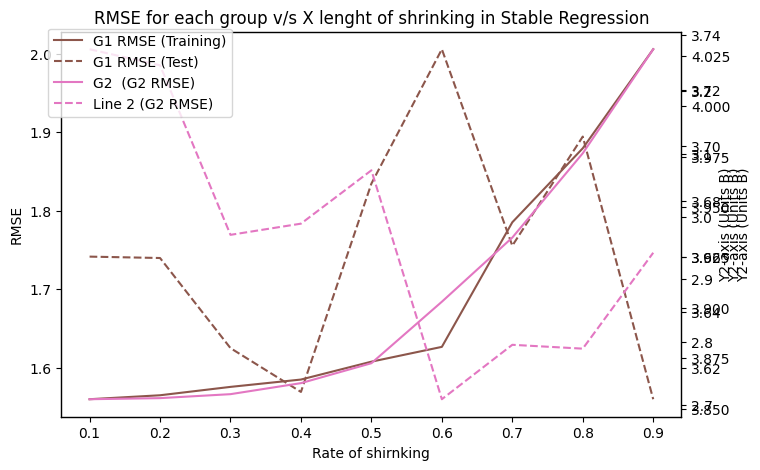

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.265552530035973
RMSE group 1 (sex_M=1):  1.5206374609807456
RMSE group 2 (sex_M=0):  2.792647161388519
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.888088616462995
RMSE group 1 (sex_M=1):  3.691549097077191
RMSE group 2 (sex_M=0):  4.0558748858691285
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.27241

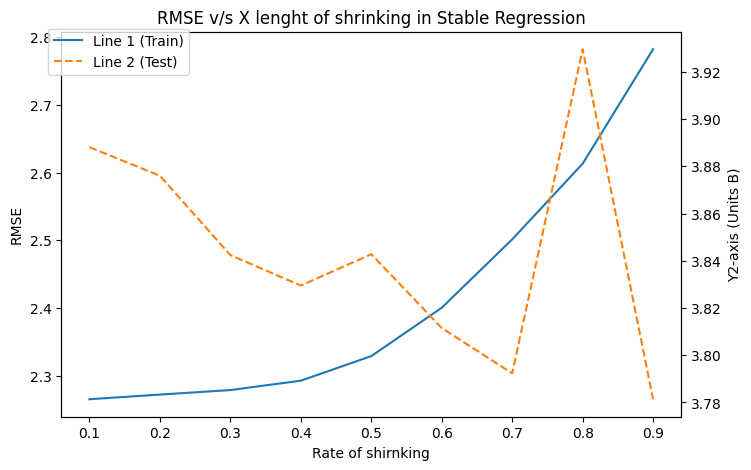

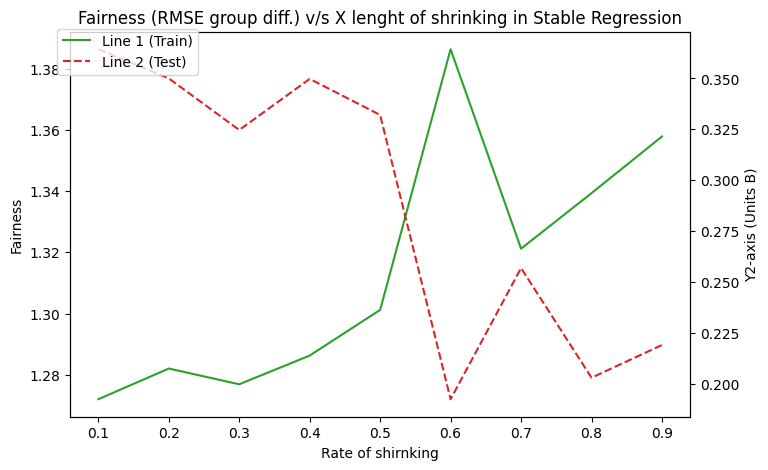

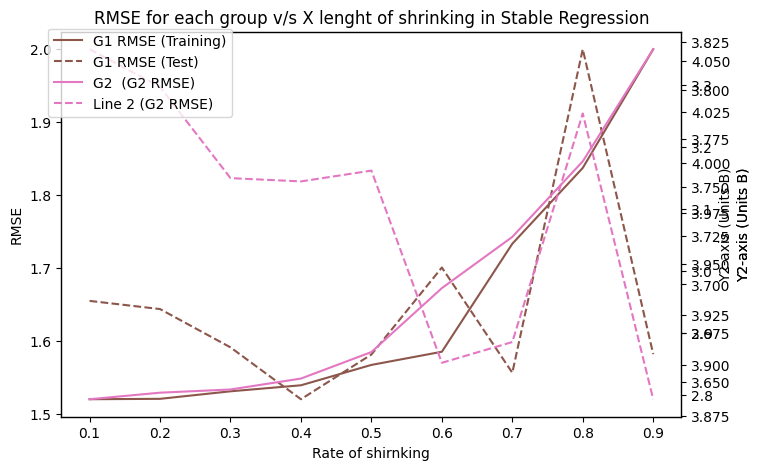

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.315634245147813
RMSE group 1 (sex_M=1):  1.4803912697070831
RMSE group 2 (sex_M=0):  2.891258068089694
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.934771588799166
RMSE group 1 (sex_M=1):  3.7265054641338646
RMSE group 2 (sex_M=0):  4.1121838087055895
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.3246

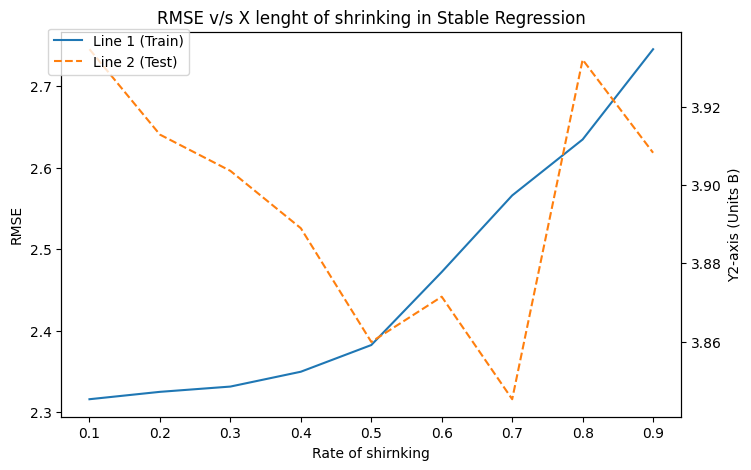

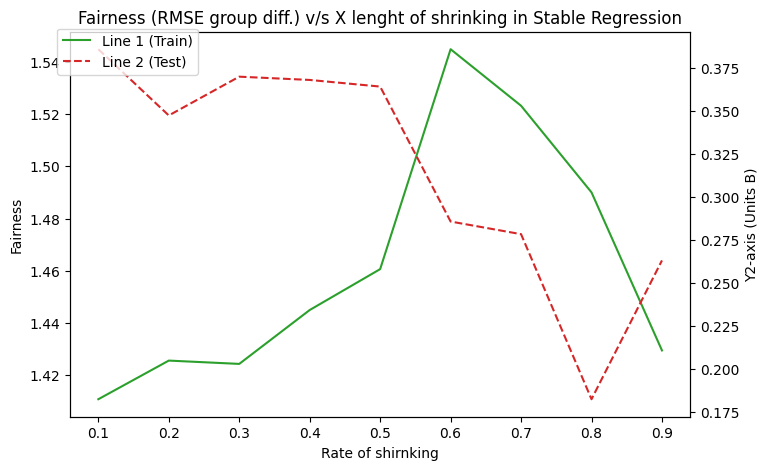

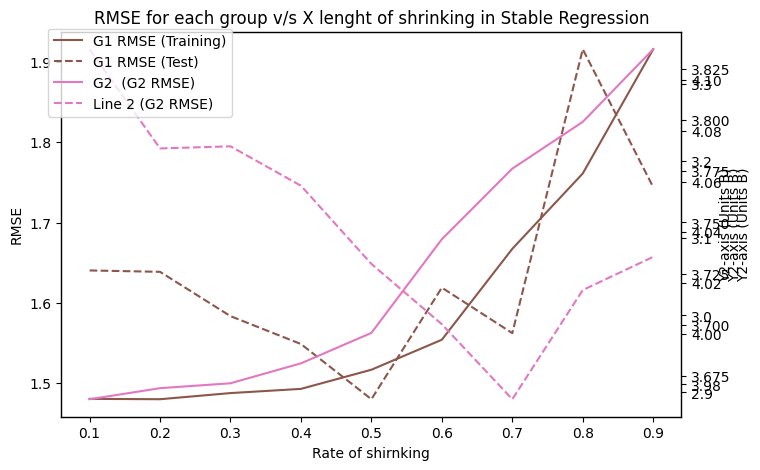

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.375917919418565
RMSE group 1 (sex_M=1):  1.4402261436172428
RMSE group 2 (sex_M=0):  3.0034057377598917
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  3.990687674671027
RMSE group 1 (sex_M=1):  3.773130769396461
RMSE group 2 (sex_M=0):  4.175747040340506
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.38019

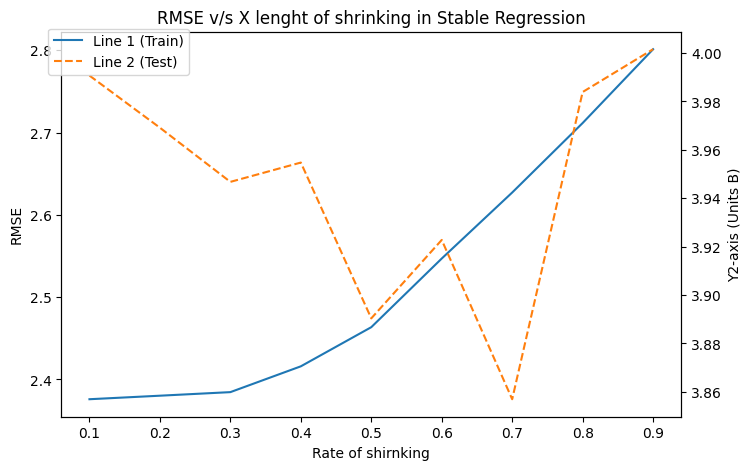

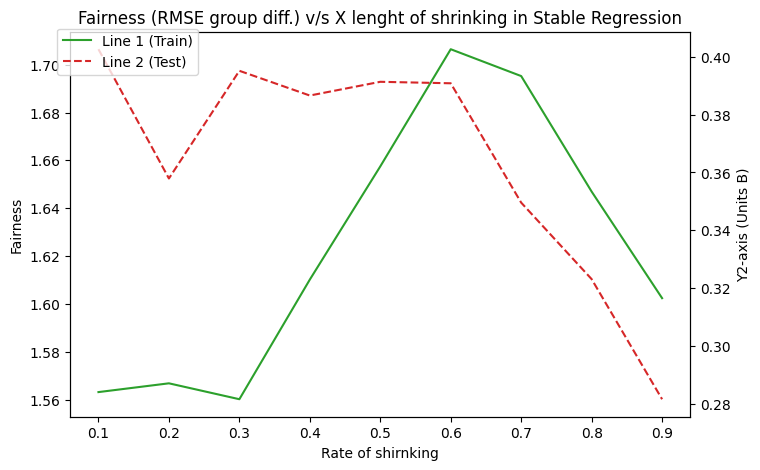

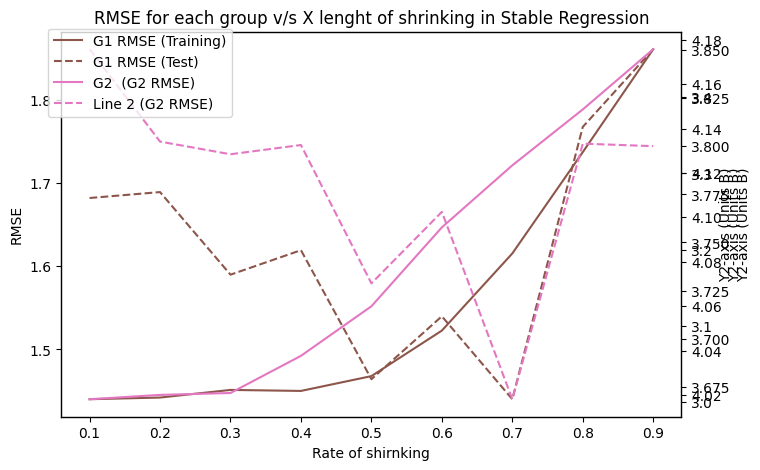

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.4548684210636518
RMSE group 1 (sex_M=1):  1.3979321239005846
RMSE group 2 (sex_M=0):  3.142586068372042
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.061210218808806
RMSE group 1 (sex_M=1):  3.836109124643702
RMSE group 2 (sex_M=0):  4.252528407119978
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.45564

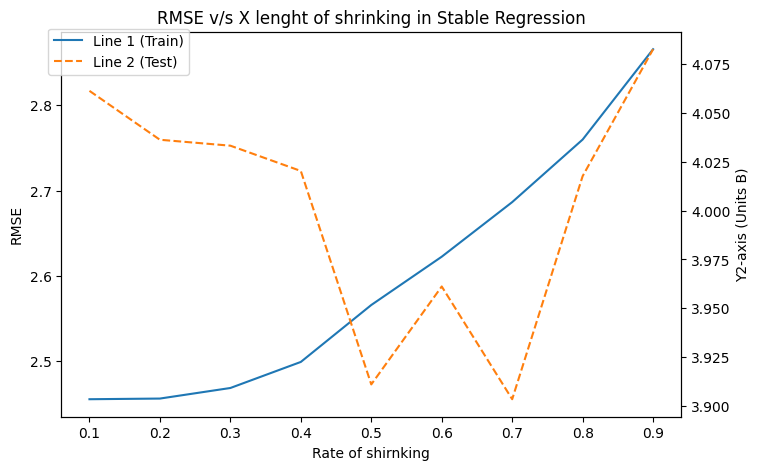

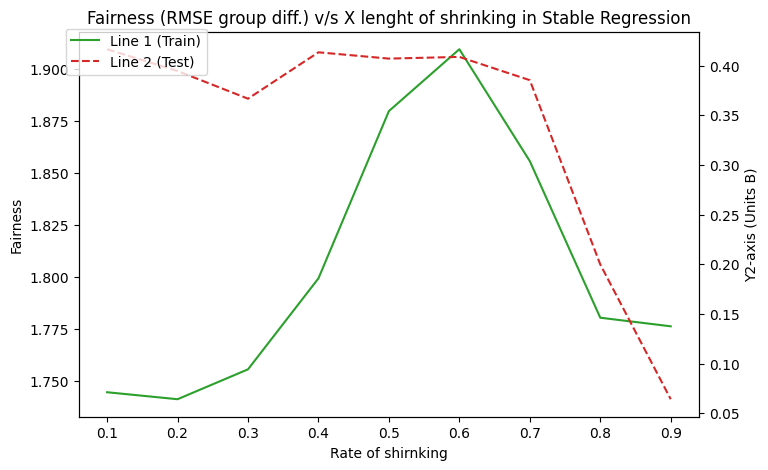

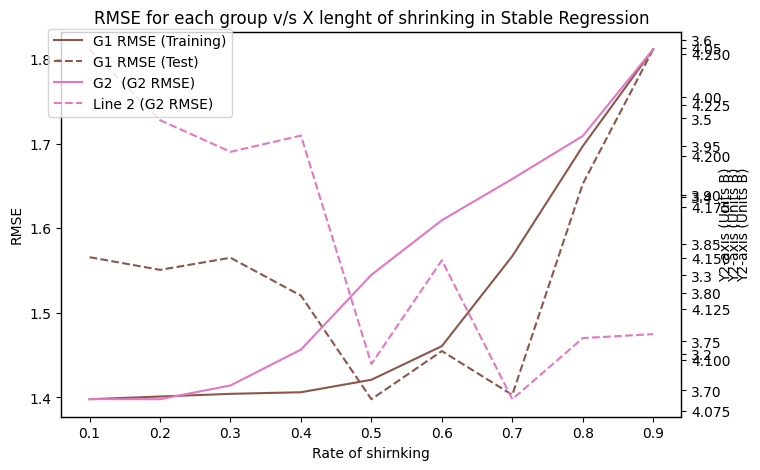

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.560886832310281
RMSE group 1 (sex_M=1):  1.3536751599341592
RMSE group 2 (sex_M=0):  3.3204531782360287
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.162978793002237
RMSE group 1 (sex_M=1):  3.9288211110710645
RMSE group 2 (sex_M=0):  4.361846102572122
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.5634

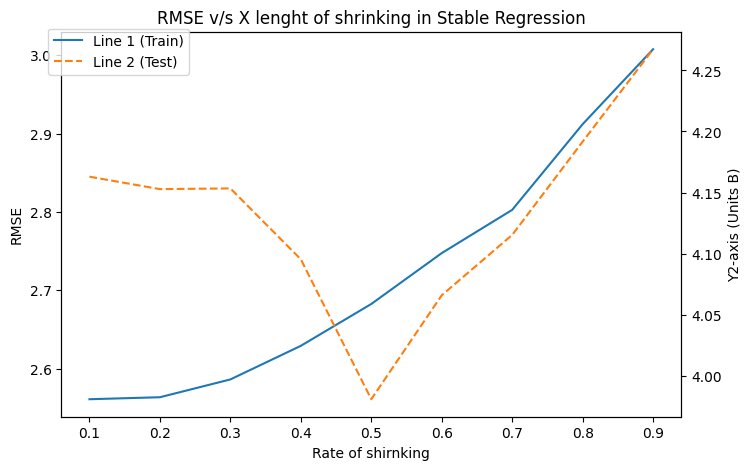

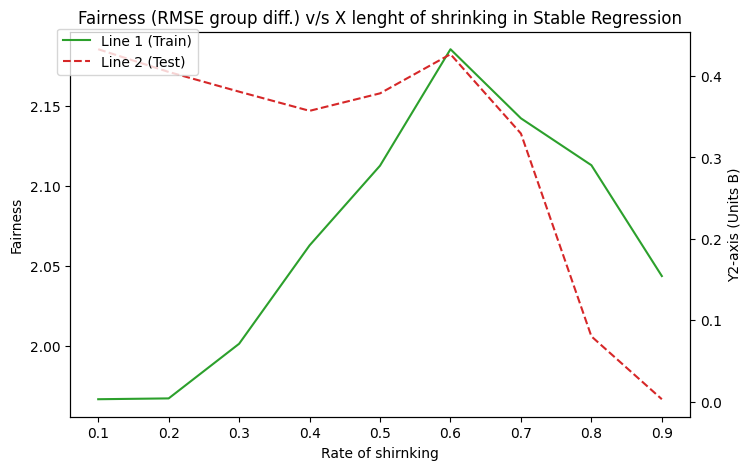

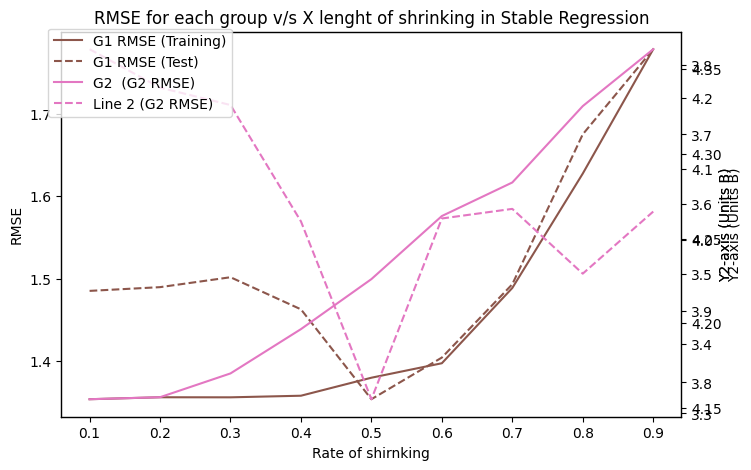

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.709802523833013
RMSE group 1 (sex_M=1):  1.3087423649510788
RMSE group 2 (sex_M=0):  3.558841107795862
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.294409806694687
RMSE group 1 (sex_M=1):  4.054036301804498
RMSE group 2 (sex_M=0):  4.49860695071936
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.7204843

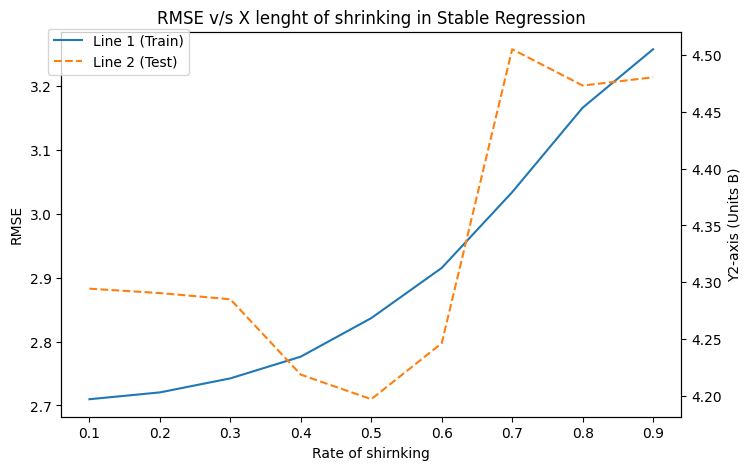

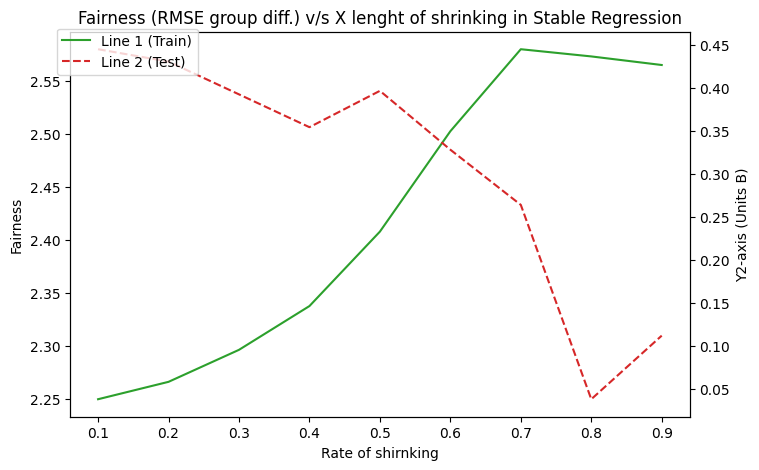

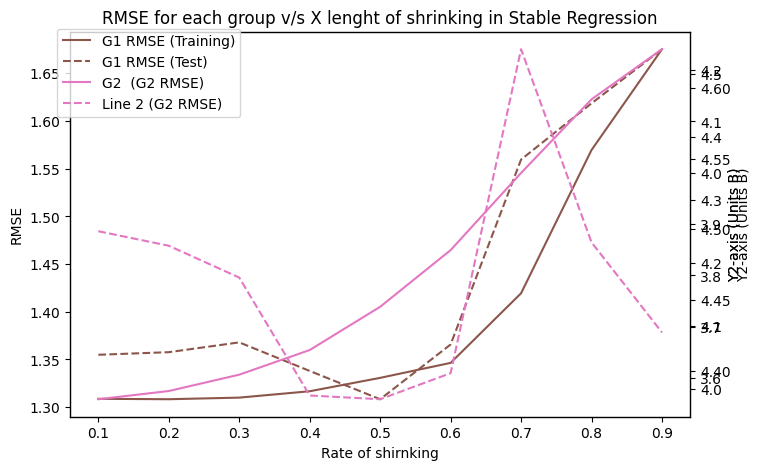

----------------------------------------------------------------------------------------------------
Alpha: Worst 0.1 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.9447893485543033
RMSE group 1 (sex_M=1):  1.2650015675931656
RMSE group 2 (sex_M=0):  3.9187515825801906
RMSE group 1 (sex_M=1) self-model:  1.2315644682014801
RMSE group 1 (sex_M=0) self-model:  1.3366338745706114
Testing metrics for Target=G3: 
RMSE:  4.494529132358877
RMSE group 1 (sex_M=1):  4.255521261374284
RMSE group 2 (sex_M=0):  4.69808290059427
RMSE group 1 (sex_M=1) self-model:  5.065378311279638
RMSE group 1 (sex_M=0) self-model:  5.382904063596781
----------------------------------------------------------------------------------------------------
Alpha: Worst 0.2 (?)
----------------------------------------------------------------------------------------------------
Training metrics for Target=G3: 
RMSE:  2.95686

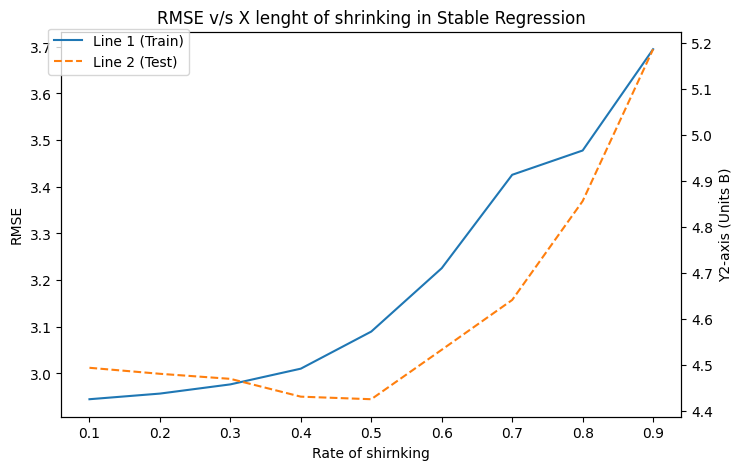

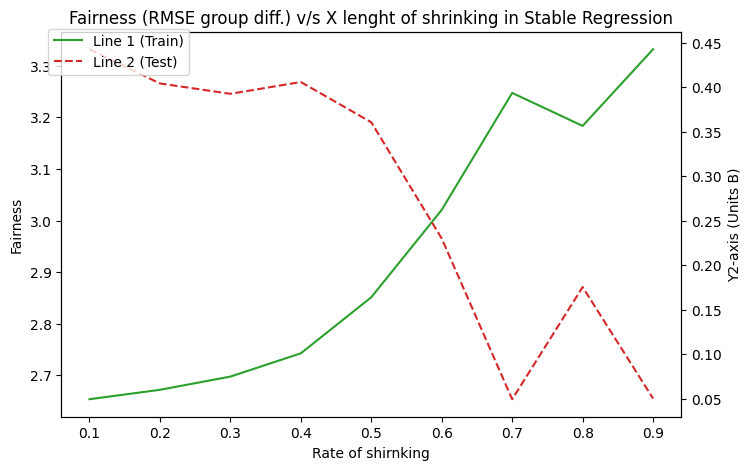

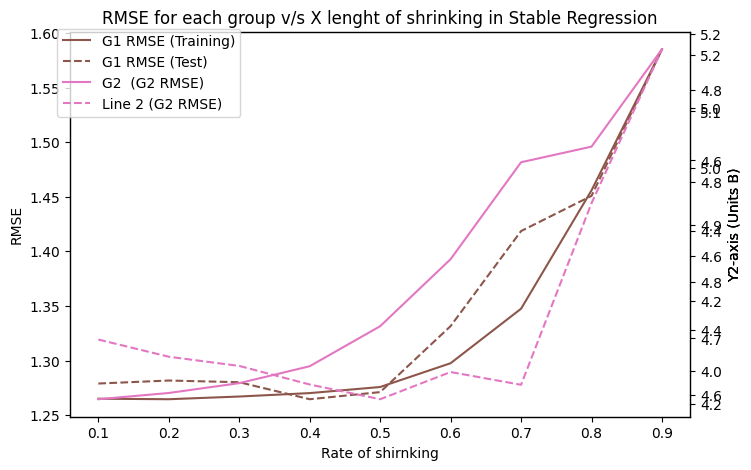

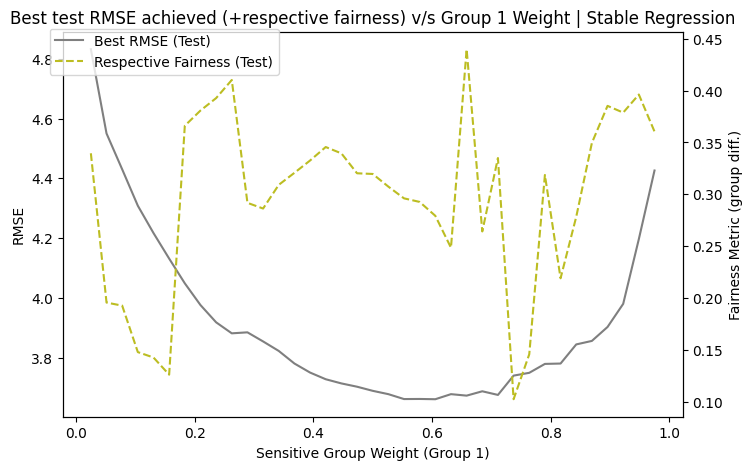

In [193]:
# print(X)

best_test_rmse = []
best_test_fairness = []

sensitive_weights = np.linspace(0.025, 0.975, 37)
for sens_wght in sensitive_weights: 

    train_rmse = []
    test_rmse = []
    train_fairness = []
    test_fairness = []
    train_fairness_g1 = []
    train_fairness_g2 = []
    test_fairness_g1 = []
    test_fairness_g2 = []

    train_sample_fairness = []
    test_sample_fairness = []

    n_shrinks = 20
    alphas = np.linspace(0.1, 0.9, 9)#range(0., n_shrinks-4, 1)

    for alpha in alphas:
        # alpha = alpha_/n_shrinks
        print("-"*100)
        print(f"Alpha: Worst {alpha} (?)")
        print("-"*100)

        # Predict
        lm = StableRegressionCVaR(fit_intercept=True, solver="MOSEK", alpha=alpha, lambda1=1e-5,lambda2=1e-3, sensitive_group_idx=sensitive_idx_train, sensitive_weight=sens_wght)
        lm.fit(X_train, y_train)

        y_pred_train = lm.predict(X_train)
        y_pred_test = lm.predict(X_test)

        beta_ = lm.coef_

        # X_g1, y_g1 = np.array(X_test.loc[sensitive, :]), np.array(y_test.loc[sensitive])
        # X_g2, y_g2 = np.array(X_test.loc[~sensitive, :]), np.array(y_test.loc[~sensitive])

        mask_np = (sensitive_idx_train == 1)  # bool ndarray

        X_g1 = X_train.iloc[mask_np, :]
        y_g1 = y_train.iloc[mask_np]
        X_g2 = X_train.iloc[~mask_np, :]
        y_g2 = y_train.iloc[~mask_np]

        y_g1_pred = X_g1 @ beta_ + lm.intercept_
        y_g2_pred = X_g2 @ beta_ + lm.intercept_

        print(f"Training metrics for Target={target}: ")
        print("RMSE: ", root_mean_squared_error(y_train, y_pred_train))
        train_rmse.append(root_mean_squared_error(y_train, y_pred_train))
        f_g1 = root_mean_squared_error(y_g1, y_g1_pred)
        f_g2 = root_mean_squared_error(y_g2, y_g2_pred)
        print(f"RMSE group 1 ({sensitive_feature}=1): ", f_g1)
        print(f"RMSE group 2 ({sensitive_feature}=0): ", f_g2)
        train_fairness.append(np.abs(f_g1-f_g2))
        train_fairness_g1.append(f_g1)
        train_fairness_g2.append(f_g2)
        abs_errors = np.abs(y_train - y_pred_train)
        train_sample_fairness.append(max(abs_errors) - min(abs_errors))
        # print(f"Relative RMSE group 1 ({sensitive_feature}=1): ", root_mean_squared_error(y_g1, y_g1_pred)/root_mean_squared_error(y_train, y_pred_train))
        # print(f"Relative RMSE group 2 ({sensitive_feature}=0): ", root_mean_squared_error(y_g2, y_g2_pred)/root_mean_squared_error(y_train, y_pred_train))


        lm_g1 = StableRegressionCVaR(fit_intercept=True, solver="MOSEK", alpha=alpha, lambda2=1e-4)
        lm_g1.fit(X_g1, y_g1)
        y_g1_pred = lm_g1.predict(X_g1)
        print(f"RMSE group 1 ({sensitive_feature}=1) self-model: ", root_mean_squared_error(y_g1, y_g1_pred))
        lm_g2 = StableRegressionCVaR(fit_intercept=True, solver="MOSEK", alpha=alpha, lambda2=1e-4)
        lm_g2.fit(X_g2, y_g2)
        y_g2_pred = lm_g2.predict(X_g2)
        print(f"RMSE group 1 ({sensitive_feature}=0) self-model: ", root_mean_squared_error(y_g2, y_g2_pred))


        mask_np = (sensitive_idx_test == 1)  # bool ndarray

        X_g1 = X_test.iloc[mask_np, :]
        y_g1 = y_test.iloc[mask_np]
        X_g2 = X_test.iloc[~mask_np, :]
        y_g2 = y_test.iloc[~mask_np]

        y_g1_pred = X_g1 @ beta_ + lm.intercept_
        y_g2_pred = X_g2 @ beta_ + lm.intercept_

        print(f"Testing metrics for Target={target}: ")
        print("RMSE: ", root_mean_squared_error(y_test, y_pred_test))
        test_rmse.append(root_mean_squared_error(y_test, y_pred_test))
        f_g1 = root_mean_squared_error(y_g1, y_g1_pred)
        f_g2 = root_mean_squared_error(y_g2, y_g2_pred)
        print(f"RMSE group 1 ({sensitive_feature}=1): ", f_g1)
        print(f"RMSE group 2 ({sensitive_feature}=0): ", f_g2)
        test_fairness.append(np.abs(f_g1-f_g2))
        test_fairness_g1.append(f_g1)
        test_fairness_g2.append(f_g2)
        abs_errors = np.abs(y_test - y_pred_test)
        test_sample_fairness.append(max(abs_errors) - min(abs_errors))

        y_g1_pred = lm_g1.predict(X_g1)
        print(f"RMSE group 1 ({sensitive_feature}=1) self-model: ", root_mean_squared_error(y_g1, y_g1_pred))
        y_g2_pred = lm_g2.predict(X_g2)
        print(f"RMSE group 1 ({sensitive_feature}=0) self-model: ", root_mean_squared_error(y_g2, y_g2_pred))


    # Create a figure and the first axes
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first line on ax1
    ax1.plot(alphas, train_rmse, color='C0', label='Line 1 (Train)')
    ax1.set_xlabel('Rate of shirnking')
    ax1.set_ylabel('RMSE', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Create a second axes that shares the same x-axis but has an independent y-axis
    ax2 = ax1.twinx()
    # Plot the second line on ax2
    ax2.plot(alphas, test_rmse, '--', color='C1', label='Line 2 (Test)')
    ax2.set_ylabel('Y2-axis (Units B)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Add a title and legend
    plt.title('RMSE v/s X lenght of shrinking in Stable Regression')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Place legend manually for clarity

    # Display the plot
    plt.show()




    # Create a figure and the first axes
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot the first line on ax1
    ax1.plot(alphas, train_fairness, color='C2', label='Line 1 (Train)')
    ax1.set_xlabel('Rate of shirnking')
    ax1.set_ylabel('Fairness', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    # Create a second axes that shares the same x-axis but has an independent y-axis
    ax2 = ax1.twinx()
    # Plot the second line on ax2
    ax2.plot(alphas, test_fairness, '--', color='C3', label='Line 2 (Test)')
    ax2.set_ylabel('Y2-axis (Units B)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    # Add a title and legend
    plt.title('Fairness (RMSE group diff.) v/s X lenght of shrinking in Stable Regression')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Place legend manually for clarity
    # Display the plot
    plt.show()







    # Create a figure and the first axes
    fig, ax1 = plt.subplots(figsize=(8, 5))
    # Plot the first line on ax1
    ax1.plot(alphas, train_fairness_g1, color='C5', label='G1 RMSE (Training)')
    ax1.set_xlabel('Rate of shirnking')
    ax1.set_ylabel('RMSE', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    # Create a second axes that shares the same x-axis but has an independent y-axis
    ax2 = ax1.twinx()
    # Plot the second line on ax2
    ax2.plot(alphas, test_fairness_g1, '--', color='C5', label='G1 RMSE (Test)')
    ax2.set_ylabel('Y2-axis (Units B)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    # Create a second axes that shares the same x-axis but has an independent y-axis
    ax3 = ax1.twinx()
    # Plot the second line on ax3
    ax3.plot(alphas, train_fairness_g2, color='C6', label='G2  (G2 RMSE)')
    ax3.set_ylabel('Y2-axis (Units B)', color='black')
    ax3.tick_params(axis='y', labelcolor='black')
    # Create a second axes that shares the same x-axis but has an independent y-axis
    ax4 = ax1.twinx()
    # Plot the second line on ax4
    ax4.plot(alphas, test_fairness_g2, '--', color='C6', label='Line 2 (G2 RMSE)')
    ax4.set_ylabel('Y2-axis (Units B)', color='black')
    ax4.tick_params(axis='y', labelcolor='black')

    # Add a title and legend
    plt.title('RMSE for each group v/s X lenght of shrinking in Stable Regression')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Place legend manually for clarity

    # Display the plot
    plt.show()
    # plt.figure(figsize=(8,6))
    # plt.plot(alphas, train_fairness)
    # plt.plot(alphas, train_fairness_g1)
    # plt.plot(alphas, train_fairness_g2)
    # plt.show()

    # # Create a second axes that shares the same x-axis but has an independent y-axis
    # ax3 = ax1.twinx()
    # # Plot the second line on ax2
    # ax3.plot(alphas, train_fairness, color='C2', label='Fairness (Train)')
    # ax3.set_ylabel('Y2-axis (Units B)', color='black')
    # ax3.tick_params(axis='y', labelcolor='black')

    # # Create a second axes that shares the same x-axis but has an independent y-axis
    # ax4 = ax1.twinx()
    # # Plot the second line on ax2
    # ax4.plot(alphas, test_fairness, color='C3', label='Fairness (Test)')
    # ax4.set_ylabel('Y2-axis (Units B)', color='black')
    # ax4.tick_params(axis='y', labelcolor='black')



    min_idx = np.argmin(test_rmse)
    best_test_rmse.append(test_rmse[min_idx])
    best_test_fairness.append(test_fairness[min_idx])




# Create a figure and the first axes
fig, ax1 = plt.subplots(figsize=(8, 5))
# Plot the first line on ax1
ax1.plot(sensitive_weights, best_test_rmse, color='C7', label='Best RMSE (Test)')
ax1.set_xlabel('Sensitive Group Weight (Group 1)')
ax1.set_ylabel('RMSE', color='black')
ax1.tick_params(axis='y', labelcolor='black')
# Create a second axes that shares the same x-axis but has an independent y-axis
ax2 = ax1.twinx()
# Plot the second line on ax2
ax2.plot(sensitive_weights, best_test_fairness, '--', color='C8', label='Respective Fairness (Test)')
ax2.set_ylabel('Fairness Metric (group diff.)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and legend
plt.title('Best test RMSE achieved (+respective fairness) v/s Group 1 Weight | Stable Regression')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9)) # Place legend manually for clarity

# Display the plot
plt.show()


# Frank Wolfe approach (similar to the one for large scale LASSO ?)


In [234]:
import numpy as np
import cvxpy as cp
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import StandardScaler

class StableTopKCVPath(BaseEstimator, RegressorMixin):
    r"""
    Efficient 1-D search over K for stable (top-K / CVaR) regression with validation selection.

    Inner (training) problem for a fixed K (squared loss / SOCP):
        min_{beta,b0, tau, xi>=0}    tau + (1/((1-alpha)*n)) * sum_i xi_i  +  (lambda2/2)||beta||_2^2 + lambda1||beta||_1
        s.t.   (y_i - b0 - x_i^T beta)^2 - tau <= xi_i   for i=1..n
        where alpha = 1 - K/n.

    Outer (model selection): choose K from a grid to minimize validation MSE.

    This class implements a practical, exact pipeline with:
      • Warm-start continuation in alpha (follow a path of nearby K values)
      • "Quantile anchoring" of tau at the K-th largest residual^2 from the previous solution
      • Optional elastic-net regularization (lambda1 for L1, lambda2 for L2; set to 0 to disable)

    Parameters
    ----------
    K_grid : list[int] or None
        Candidate K values (1..n_train). If None, we build a default grid covering the range.
    loss : {"l2"}
        Currently squared residuals (SOCP). (L1 can be added similarly as LP.)
    lambda1 : float >= 0
        L1 (lasso) weight on beta.
    lambda2 : float >= 0
        L2 (ridge) weight on beta.
    fit_intercept : bool
        Whether to learn an intercept.
    standardize : bool
        Standardize X and center y for numerics; coefficients are mapped back.
    alpha_path_step : float in (0,1)
        Maximum change in alpha between consecutive inner solves (for warm-start path building).
    solver : str or None
        cvxpy solver for SOCP ("MOSEK", "CLARABEL", or "ECOS"). Auto if None.
    solver_kwargs : dict
        Extra kwargs passed to problem.solve().
    verbose : bool
        Print brief path progress.

    Attributes
    ----------
    best_K_ : int
        Selected K minimizing validation MSE.
    coef_ : (p,) ndarray
        Coefficients in original scaling.
    intercept_ : float
        Intercept in original scale.
    val_mse_curve_ : dict
        Mapping {K: validation MSE} evaluated.
    inner_values_ : dict
        Mapping {K: inner objective value}.
    """

    def __init__(self,
                 K_grid=None,
                 loss="l2",
                 lambda1=0.0,
                 lambda2=1e-3,
                 fit_intercept=True,
                 standardize=True,
                 alpha_path_step=0.05,
                 solver=None,
                 solver_kwargs=None,
                 verbose=False):
        self.K_grid = K_grid
        self.loss = loss
        self.lambda1 = float(lambda1)
        self.lambda2 = float(lambda2)
        self.fit_intercept = bool(fit_intercept)
        self.standardize = bool(standardize)
        self.alpha_path_step = float(alpha_path_step)
        self.solver = solver
        self.solver_kwargs = solver_kwargs or {}
        self.verbose = verbose
        # learned
        self.best_K_ = None
        self.coef_ = None
        self.intercept_ = 0.0
        self.val_mse_curve_ = {}
        self.inner_values_ = {}

    # --------------- utilities ---------------
    def _prepare_train(self, X, y):
        X = check_array(X, accept_sparse=False, dtype=float)
        y = np.asarray(y, dtype=float).reshape(-1)
        X, y = check_X_y(X, y, accept_sparse=False, dtype=float, y_numeric=True)
        if self.standardize:
            self._scaler = StandardScaler(with_mean=True, with_std=True)
            Xs = self._scaler.fit_transform(X)
            if self.fit_intercept:
                self._y_mean = y.mean()
            else:
                self._y_mean = 0.0
            ys = y - self._y_mean
        else:
            self._scaler = None
            self._y_mean = y.mean() if self.fit_intercept else 0.0
            Xs, ys = X, y - self._y_mean
        return Xs, ys

    def _prepare_val(self, Xv, yv):
        Xv = check_array(Xv, accept_sparse=False, dtype=float)
        yv = np.asarray(yv, dtype=float).reshape(-1)
        if self.standardize:
            Xvs = self._scaler.transform(Xv)
        else:
            Xvs = Xv
        yvs = yv - self._y_mean
        return Xvs, yvs

    def _auto_solver(self):
        installed = cp.installed_solvers()
        if self.solver is not None:
            return self.solver
        for s in ("MOSEK", "CLARABEL", "ECOS"):
            if s in installed:
                return s
        raise RuntimeError("No suitable conic solver found; install MOSEK/CLARABEL/ECOS.")

    # --------------- inner SOCP solve for fixed alpha ---------------
    def _solve_inner_socp(self, Xs, ys, alpha, beta_ws=None, b0_ws=None, tau_anchor=None):
        n, p = Xs.shape
        beta = cp.Variable(p)
        b0 = cp.Variable() if self.fit_intercept else 0.0
        tau = cp.Variable()
        xi = cp.Variable(n)
        r = ys - (Xs @ beta + (b0 if self.fit_intercept else 0.0))
        cons = [tau >= 0]
        # SOC epigraph: r_i^2 <= s_i with s_i eliminated directly by rotated cone representation
        # We'll write as: ||[2 r_i, 1 - t_i]||_2 <= 1 + t_i  with t_i := tau + xi_i (so r_i^2 <= tau + xi_i)
        # Simpler: use standard inequality r_i^2 - tau <= xi_i  via SOC: ||[2 r_i, xi_i - tau - 1]||_2 <= xi_i - tau + 1
        for i in range(n):
            # cons += [cp.norm(cp.hstack([2*r[i], xi[i] - tau - 1]), 2) <= xi[i] - tau + 1]
            # cons += [xi[i] >= 0]
            # Fix: inside the loop over i
            cons += [cp.square(r[i]) - tau <= xi[i]]
            cons += [xi[i] >= 0]
        reg = 0
        if self.lambda2 > 0:
            reg += (self.lambda2/2.0) * cp.sum_squares(beta)
        if self.lambda1 > 0:
            u = cp.Variable(p)
            cons += [u >= beta, u >= -beta]
            reg += self.lambda1 * cp.sum(u)
        cvar = tau + (1.0/((1.0 - alpha) * n)) * cp.sum(xi)
        obj = cp.Minimize(cvar + reg)
        prob = cp.Problem(obj, cons)
        # warm starts
        if beta_ws is not None:
            beta.value = beta_ws
        if self.fit_intercept and (b0_ws is not None):
            b0.value = b0_ws
        if tau_anchor is not None:
            tau.value = tau_anchor
        val = prob.solve(solver=self._auto_solver(), warm_start=True, **self.solver_kwargs)
        if prob.status not in (cp.OPTIMAL, cp.OPTIMAL_INACCURATE):
            raise RuntimeError(f"Inner problem not optimal: {prob.status}")
        beta_v = beta.value
        b0_v = float(b0.value) if self.fit_intercept else 0.0
        return beta_v, b0_v, prob.value, xi.value

    # --------------- public API ---------------
    def fit(self, X_train, y_train, X_val, y_val):
        """Train the inner problem along a path of K (alpha) values and pick K with lowest validation MSE."""
        Xs, ys = self._prepare_train(X_train, y_train)
        Xvs, yvs = self._prepare_val(X_val, y_val)
        n, p = Xs.shape

        # Build K grid if not given
        if self.K_grid is None:
            # default: coarse-to-fine grid biased to larger K (milder robustness)
            base = np.unique(np.clip((np.linspace(0.05, 0.95, 11) * n).astype(int), 1, n-1))
            self.K_grid = sorted(set(base.tolist() + [max(1, n//20), n//10, n//5, n//2]))
        else:
            self.K_grid = sorted(int(k) for k in self.K_grid if 1 <= int(k) <= n-1)
        if len(self.K_grid) == 0:
            raise ValueError("K_grid must contain integers in [1, n-1].")

        # Order by alpha and build continuation path
        alphas = [1.0 - k/float(n) for k in self.K_grid]
        order = np.argsort(alphas)
        K_seq = [self.K_grid[i] for i in order]
        alpha_seq = [alphas[i] for i in order]

        # Initialize with a ridge LS warm start
        lam = max(self.lambda2, 1e-6)
        beta_ws = np.linalg.solve(Xs.T @ Xs + lam*np.eye(p), Xs.T @ ys)
        b0_ws = 0.0

        for idx, (K, alpha) in enumerate(zip(K_seq, alpha_seq)):
            # If alpha jump is big from previous, step through intermediate alphas for better warm start
            if idx > 0:
                a_prev = alpha_seq[idx-1]
                a_cur = alpha
                steps = int(np.ceil(abs(a_cur - a_prev) / max(1e-9, self.alpha_path_step)))
                if steps > 1:
                    for s in range(1, steps):
                        a_mid = a_prev + (a_cur - a_prev) * s/steps
                        # tau anchoring from current residuals
                        r = ys - (Xs @ beta_ws + b0_ws)
                        K_mid = max(1, int(np.ceil((1.0 - a_mid) * n)))
                        kth = np.partition(r**2, -K_mid)[-K_mid]
                        tau_anchor = float(kth)
                        beta_ws, b0_ws, _, _ = self._solve_inner_socp(Xs, ys, a_mid, beta_ws, b0_ws, tau_anchor)

            # Solve at target alpha with tau anchored at K-th residual square
            r = ys - (Xs @ beta_ws + b0_ws)
            kth = np.partition(r**2, -K)[-K]
            tau_anchor = float(kth)
            beta_ws, b0_ws, inner_val, xi_dual = self._solve_inner_socp(Xs, ys, alpha, beta_ws, b0_ws, tau_anchor)
            selected_samples = np.where(xi_dual > 1e-6)[0] # [MINE] positive dual: xi(wi - 1) = 0 => wi=1 (if not, we can set wi=0)
            Xvs, yvs = Xs[selected_samples,:].copy(), ys[selected_samples].copy()
            # Evaluate validation MSE
            yhat_val = Xvs @ beta_ws + b0_ws
            mse = float(np.mean((yvs - yhat_val)**2))
            mse_percentage = mse / inner_val # [MINE] Normalize by the inner value MSE
            self.val_mse_curve_[K] = mse_percentage # [MINE] Normalize by the inner value MSE
            self.inner_values_[K] = inner_val
            if self.verbose:
                print(f"K={K:4d} (alpha={alpha:0.4f}) | val MSE={mse:0.6f} | val MSE %={mse_percentage:0.6f} | inner={inner_val:0.6f}")

        # Pick best K
        best_K = min(self.val_mse_curve_, key=self.val_mse_curve_.get)
        self.best_K_ = int(best_K)

        # Store final coefficients in original scale
        if self.standardize:
            scale = self._scaler.scale_
            mean = self._scaler.mean_
            self.coef_ = beta_ws / scale
            self.intercept_ = self._y_mean - float(mean @ (beta_ws/scale)) + b0_ws
        else:
            self.coef_ = beta_ws
            self.intercept_ = self._y_mean + b0_ws
        return self

    def predict(self, X):
        X = check_array(X, accept_sparse=False, dtype=float)
        if self.coef_ is None:
            raise ValueError("Model is not fitted.")
        return X @ self.coef_ + self.intercept_


In [235]:
n,m = X_train.shape
print(n,m)



# lambda_cvar : float >= 0
#     Trade-off weight for the CVaR stability term in the objective.
fw_sr = StableTopKCVPath(
                #  K_grid=list(range(1,n)),
                #  loss="l2",
                 lambda1=1e-6,#0.0,
                 lambda2=1e-4,
                 fit_intercept=True,
                #  standardize=True,
                #  alpha_path_step=0.05,
                 solver="MOSEK",
                #  solver_kwargs=None,
                 verbose=True)

fw_sr.fit(X_train, y_train, X_val=X_val, y_val=y_val)#, groups=sensitive_idx_train)
y_pred_train = fw_sr.predict(X_train)
y_pred_test = fw_sr.predict(X_test)

beta_ = fw_sr.coef_

# X_g1, y_g1 = np.array(X_test.loc[sensitive, :]), np.array(y_test.loc[sensitive])
# X_g2, y_g2 = np.array(X_test.loc[~sensitive, :]), np.array(y_test.loc[~sensitive])

mask_np = (sensitive_idx_train == 1)  # bool ndarray

X_g1 = X_train.iloc[mask_np, :]
y_g1 = y_train.iloc[mask_np]
X_g2 = X_train.iloc[~mask_np, :]
y_g2 = y_train.iloc[~mask_np]

y_g1_pred = X_g1 @ beta_ + fw_sr.intercept_
y_g2_pred = X_g2 @ beta_ + fw_sr.intercept_

print("Training metrics: ")
print("RMSE: ", root_mean_squared_error(y_train, y_pred_train))
print("RMSE G1: ", root_mean_squared_error(y_g1, y_g1_pred))
print("RMSE G2: ", root_mean_squared_error(y_g2, y_g2_pred))
# print("RMSE G1: ", root_mean_squared_error(y_g1, y_g1_pred)/root_mean_squared_error(y_train, y_pred_train))
# print("RMSE G2: ", root_mean_squared_error(y_g2, y_g2_pred)/root_mean_squared_error(y_train, y_pred_train))

mask_np = (sensitive_idx_test == 1)  # bool ndarray

X_g1 = X_test.iloc[mask_np, :]
y_g1 = y_test.iloc[mask_np]
X_g2 = X_test.iloc[~mask_np, :]
y_g2 = y_test.iloc[~mask_np]

y_g1_pred = X_g1 @ beta_ + fw_sr.intercept_
y_g2_pred = X_g2 @ beta_ + fw_sr.intercept_

print("Testing metrics: ")
print("RMSE: ", root_mean_squared_error(y_test, y_pred_test))
print("RMSE G1: ", root_mean_squared_error(y_g1, y_g1_pred))
print("RMSE G2: ", root_mean_squared_error(y_g2, y_g2_pred))
# print("RMSE G1: ", root_mean_squared_error(y_g1, y_g1_pred)/root_mean_squared_error(y_test, y_pred_test))
# print("RMSE G2: ", root_mean_squared_error(y_g2, y_g2_pred)/root_mean_squared_error(y_test, y_pred_test))




# pd.DataFrame(X_train.toarray())
# # X_train#.iloc[sensitive,:]



228 106
K= 216 (alpha=0.0526) | val MSE=4.346045 | val MSE %=1.004145 | inner=4.328104
K= 196 (alpha=0.1404) | val MSE=4.909193 | val MSE %=1.030412 | inner=4.764299
K= 175 (alpha=0.2325) | val MSE=5.602210 | val MSE %=1.055694 | inner=5.306662
K= 155 (alpha=0.3202) | val MSE=6.329482 | val MSE %=1.071230 | inner=5.908613
K= 134 (alpha=0.4123) | val MSE=7.519578 | val MSE %=1.129938 | inner=6.654857
K= 114 (alpha=0.5000) | val MSE=8.694697 | val MSE %=1.159651 | inner=7.497684
K= 113 (alpha=0.5044) | val MSE=8.609612 | val MSE %=1.141606 | inner=7.541666
K=  93 (alpha=0.5921) | val MSE=10.186816 | val MSE %=1.202926 | inner=8.468364
K=  72 (alpha=0.6842) | val MSE=12.085360 | val MSE %=1.261064 | inner=9.583463
K=  52 (alpha=0.7719) | val MSE=13.620196 | val MSE %=1.262070 | inner=10.791953
K=  45 (alpha=0.8026) | val MSE=13.347445 | val MSE %=1.196491 | inner=11.155489
K=  31 (alpha=0.8640) | val MSE=13.929452 | val MSE %=1.199996 | inner=11.607911


c:\Users\niace\anaconda3\envs\fairness_models\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\niace\anaconda3\envs\fairness_models\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


K=  22 (alpha=0.9035) | val MSE=nan | val MSE %=nan | inner=11.685995
K=  11 (alpha=0.9518) | val MSE=nan | val MSE %=nan | inner=11.685995
Training metrics: 
RMSE:  2.624550029073913
RMSE G1:  2.559558325620185
RMSE G2:  2.6847548738089397
Testing metrics: 
RMSE:  3.7888109186886543
RMSE G1:  3.8765134705515667
RMSE G2:  3.703938242755701


In [ ]:
# selected_samples:  215
# K= 216 (alpha=0.0526) | val MSE=12.680163 | inner=4.328104
# selected_samples:  190
# K= 196 (alpha=0.1404) | val MSE=12.661715 | inner=4.764299
# selected_samples:  164
# K= 175 (alpha=0.2325) | val MSE=12.364301 | inner=5.306663
# selected_samples:  140
# K= 155 (alpha=0.3202) | val MSE=12.287070 | inner=5.908613
# selected_samples:  114
# K= 134 (alpha=0.4123) | val MSE=12.621878 | inner=6.654857
# selected_samples:  92
# K= 114 (alpha=0.5000) | val MSE=12.554554 | inner=7.497684
# selected_samples:  91
# K= 113 (alpha=0.5044) | val MSE=12.567926 | inner=7.541666
# selected_samples:  68
# K=  93 (alpha=0.5921) | val MSE=12.985097 | inner=8.468364
# selected_samples:  43
# K=  72 (alpha=0.6842) | val MSE=14.052820 | inner=9.583463
# selected_samples:  26
# K=  52 (alpha=0.7719) | val MSE=14.214541 | inner=10.791953
# selected_samples:  18
# K=  45 (alpha=0.8026) | val MSE=15.318338 | inner=11.155489
# selected_samples:  6
# K=  31 (alpha=0.8640) | val MSE=14.709714 | inner=11.607911

In [ ]:
# Training metrics for Target=G3: 
# RMSE:  2.068301893008671
# RMSE group 1 (sex_M=1):  1.9864125133887145
# RMSE group 2 (sex_M=0):  2.1428374733490236
# RMSE group 1 (sex_M=1) self-model:  1.2314841467453121
# RMSE group 1 (sex_M=0) self-model:  1.3366296185168303
# Testing metrics for Target=G3: 
# RMSE:  3.7930046757866718
# RMSE group 1 (sex_M=1):  3.7057062674352292
# RMSE group 2 (sex_M=0):  3.86944466946367
# RMSE group 1 (sex_M=1) self-model:  5.09962943422749
# RMSE group 1 (sex_M=0) self-model:  5.38579432674939

TypeError: 'types.GenericAlias' object is not iterable